# Agricultural practices across European countries, while ensuring food security in a changing climate

Bhavana Lokesh

# I.Introduction

In recent decades, global awareness concerning climate change has grown significantly. With this awareness, everyone seeks to understand its long-term impacts. One major concern is its impact on crop productivity, particularly for essential staple crops.
Wheat is one of these staple crops, as it is a worldwide nutritional resource providing around 20% of calories and protein consumed by  3,4 billion people(cordis.europa.eu:https://cordis.europa.eu/article/id/442076-how-will-climate-change-affect-the-yield-and-price-of-wheat )                                

Wheat represents a key component of global food systems. That's why we aim to understand how climate change, specifically temperature variation and agricultural practices, such as fertiliser and pesticide use, affect wheat yields across European countries. 
By analysing these relationships, our goal is to identify which climate and agricultural variables most strongly influence wheat yield, helping to guide more sustainable agricultural strategies while ensuring food security in a changing climate.
This aligns with projections from the IPCC, whose 2021 summary report stated that it is likely global warming will exceed 1.5°C during the 21st century, making it even more difficult to limit warming below 2°C.(www.ipcc.ch : https://www.ipcc.ch/report/ar6/syr/resources/spm-headline-statements/)

## a. Dataset introduction 

To conduct our project, we decided to create our own dataset mainly based on the FAOSTAT database, complemented by targeted research on pesticide usage specific to wheat production in Europe. The dataset creation is available in the other notebook provided.


**Key features :**
- This features are our key
    ->No units
        [**Area**] *-> string 27 countries of Europe*
        [**Year**] *-> int64 from 1961*

**Target feature :**
- Feature we will predict in our regression model
    *->kg/ha*
        [**Wheat Yield**]





The FAOSTAT Temperature change covers the period 1961–2024. This data represents the mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. 

 The global mean surface air temperature for that period (1951-1980) was 14°C (57°F), with an uncertainty of several tenths of a degree.(nasa.gov : https://earthobservatory.nasa.gov/world-of-change/global-temperatures#:~:text=The%20data%20reflect%20how%20much,several%20tenths%20of%20a%20degree.)) 


**Climate features**
Average Temperature :
    *->°C*
        [**Month Temperature difference**] :*from January to December*
        [**Season Temperature difference**]: *Spring, Summer, Autumn, Winter*
        [**Annual Temperature difference**]

- Rainfall :
    *->mm/year*
        [**Rainfall**] 
**Data from FAOSTAT :fao.org**

For the data regarding pesticide use, we have researched the types of pesticides allowed and used in Europe for wheat production. This research will enable us to limit the amount of data and also achieve greater accuracy with our dataset (pesticides.eu :https://www.eurl-pesticides.eu/docs/public/tmplt_article.asp?CntID=745&LabID=400&Lang=EN).

**Input features :**
*Agricultural practices features *
- Pesticides :
    *->Agricultural Use in t*
        [**Herbicides**] = the sulfonyl urea 
        [**Insecticide**] = the pyrethroids
        [**Plant growthregulators** ]= chlormequat, trinexapac and ethephon

- Fertilizers : 
    *->Use per area of cropland in kg/ha*
    *->Agricultural Use in t*
        [**Nitrogen**] = N 
        [**Phosphate**] = P2O5 
        [**Potash**]= K2O

## b. Problem statement:

Analyse crop production across the European Union to understand the influence of several factors, as well as provide a model to estimate future crop production in Europe to ensure food security through the EU.

Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from biokit.viz import corrplot
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GroupKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
from scipy.stats import randint, uniform, loguniform, stats,ttest_ind, shapiro, f_oneway

# II. Target feature: Yields

### a. Preprocesing 

Wheat Yield: This is our main target feature. It represents a country's efficiency in producing a certain amount of wheat per unit of area. The larger the value is, the better this is. And because we know the surface of production for each EU country, we can acknowledge the total amount of production for each country and each year

In [2]:
df = pd.read_csv("dataset.csv")
print("Coutries in EU",df["Area"].unique())

Coutries in EU ['Austria' 'Belgium' 'Belgium-Luxembourg' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands (Kingdom of the)' 'Poland' 'Portugal' 'Romania' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden']


### b. Exploratory Data Analysis

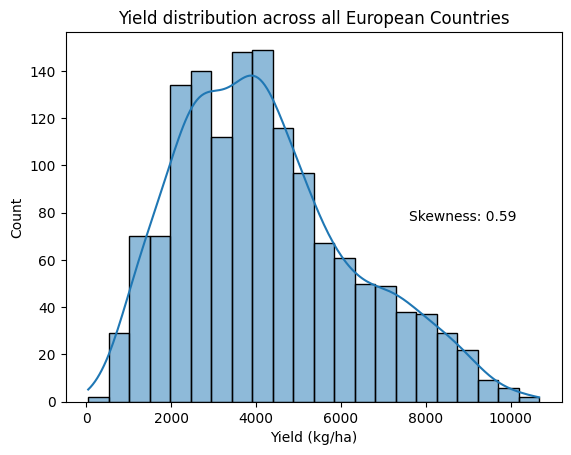

In [3]:
# Visualizing how the yield data is distributed across all our samples
sns.histplot(df["Yield (kg/ha)"],kde=True)
plt.title("Yield distribution across all European Countries")
#Add the skewness on the graph
plt.text(0.8, 0.5, f"Skewness: {df['Yield (kg/ha)'].skew():.2f}", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

This histogram shows the overall distribution of the yield. Based on the skewness measure, our dataset is moderately positively skewed. It appears to have a lower limit since the yield cannot be negative, and the average seems to be around 3000 kg/ha. We will now focus on the yield of different EU countries.

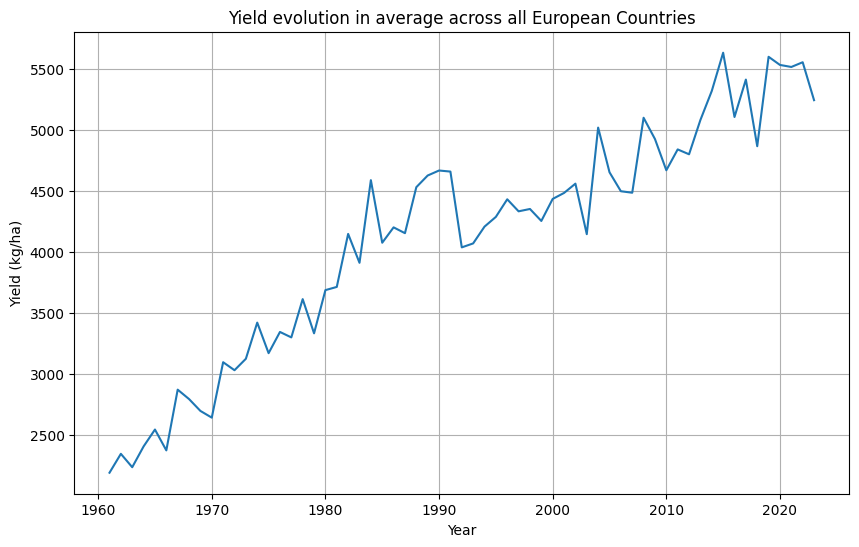

In [4]:
#Visualizing Yield evolution across all countries
plt.figure(figsize=(10, 6))
plt.plot(df["Year"].unique(),df.groupby("Year")["Yield (kg/ha)"].mean())
plt.grid()
plt.title("Yield evolution in average across all European Countries")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.show()

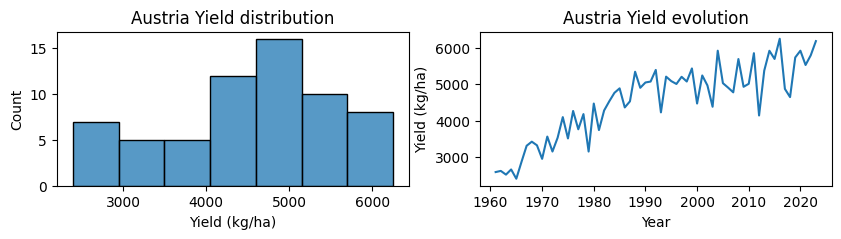

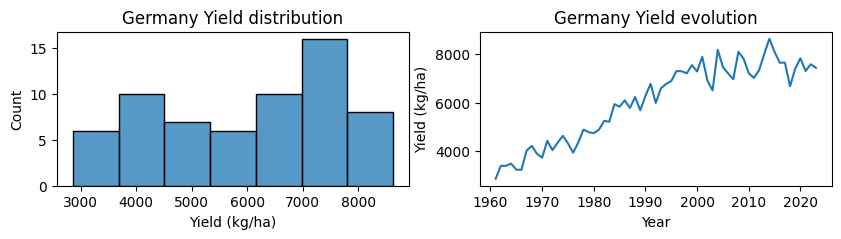

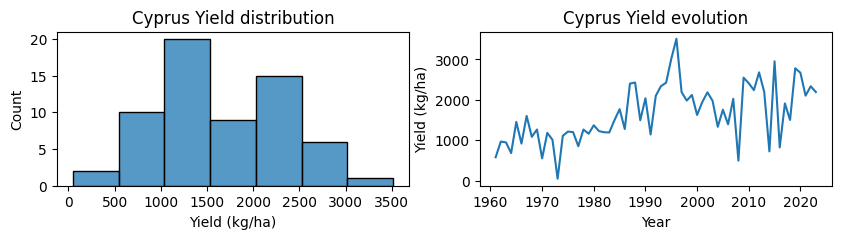

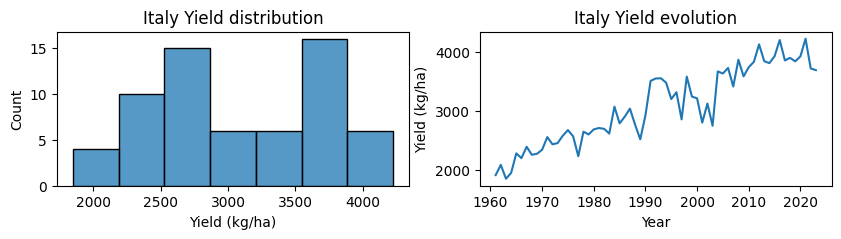

In [5]:
#Visualizaing spectific countries Yield distribution and evolution
for country in["Austria","Germany","Cyprus","Italy"]:
    #Distribution
    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    sns.histplot(df[df["Area"] == country]["Yield (kg/ha)"], label=country)
    #Evolution
    plt.title(country + " Yield distribution")
    plt.subplot(1, 2, 2)
    plt.plot(df[df["Area"] == country]["Year"],df[df["Area"] == country]["Yield (kg/ha)"], label=country)
    plt.title(country+ " Yield evolution")
    plt.xlabel("Year")
    plt.ylabel("Yield (kg/ha)")
    plt.plot()

We chose to plot the results for specific countries because displaying data for all 27 countries would be too much information. Furthermore, we observe that the distribution of our yield can vary significantly between countries, both in terms of mean and overall trend. For example, Italy has a consistently increasing yield, whereas Cyprus appears to have a steady average yield. Not every country seems to follow a Gaussian distribution.

Labelling countries by Yield

The idea in this part is to group countries by their yield performance. We initially split them into two categories based on their yield (High / Low), but after some analysis, we found that dividing our countries into three groups (Low, Medium, High) is better for the subsequent analysis.

Low yield countries: ['Cyprus' 'Estonia' 'Finland' 'Greece' 'Italy' 'Malta' 'Portugal'
 'Romania' 'Spain']
Medium yield countries: ['Austria' 'Bulgaria' 'Croatia' 'Hungary' 'Latvia' 'Lithuania' 'Poland'
 'Slovakia' 'Slovenia']
High yield countries: ['Belgium' 'Belgium-Luxembourg' 'Czechia' 'Denmark' 'France' 'Germany'
 'Ireland' 'Luxembourg' 'Netherlands (Kingdom of the)' 'Sweden']


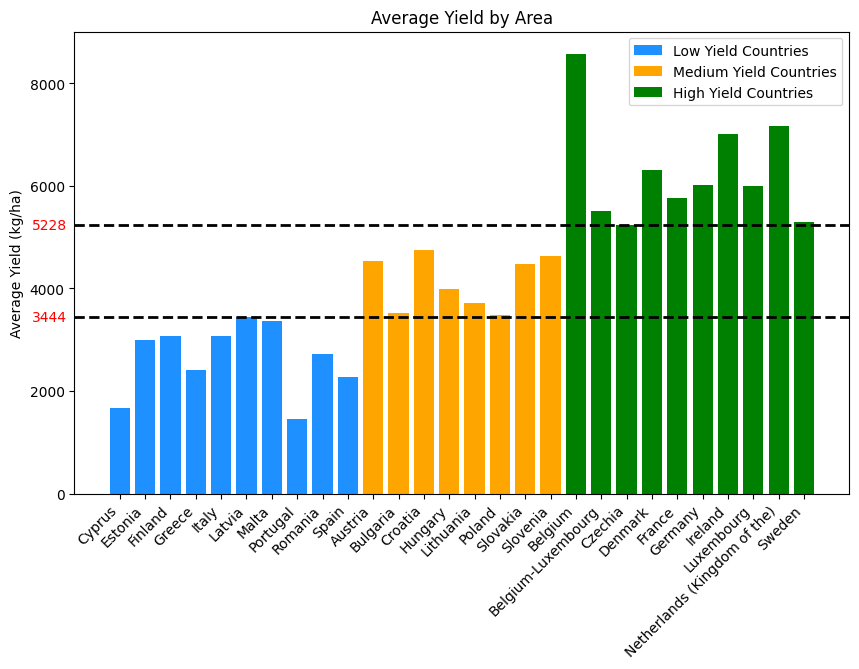

In [6]:
#Calcul of the quartiles , median, mean in order to separate the differents countries according to the yields level
q1 = df.groupby("Area")['Yield (kg/ha)'].mean().quantile(1/3)
q2 = df.groupby("Area")['Yield (kg/ha)'].mean().quantile(2/3) 

#Print the name of countries in each group
low_yield_coutries = df.groupby("Area").filter(lambda x: x["Yield (kg/ha)"].mean() <= q1)["Area"].unique()
medium_yield_coutries = df.groupby("Area").filter(lambda x: x["Yield (kg/ha)"].mean() > q1 and x["Yield (kg/ha)"].mean() <= q2)["Area"].unique()
high_yield_coutries = df.groupby("Area").filter(lambda x: x["Yield (kg/ha)"].mean() > q2)["Area"].unique()

print('Low yield countries:',low_yield_coutries)
print('Medium yield countries:',medium_yield_coutries)
print('High yield countries:',high_yield_coutries)

# Grouping the data by 'Area' and calculating the mean of 'Yield (kg/ha)'
grouped_data = df.groupby("Area")["Yield (kg/ha)"].mean().dropna()

grouped_data_low = grouped_data[grouped_data <= q1]
grouped_data_medium = grouped_data[(grouped_data > q1) & (grouped_data <= q2)]
grouped_data_high = grouped_data[grouped_data > q2]

plt.figure(figsize=(10,6))

# Plotting the bar chart
plt.bar(grouped_data_low.index, grouped_data_low.values,color=['dodgerblue'],label="Low Yield Countries")
plt.bar(grouped_data_medium.index, grouped_data_medium.values,color=['orange'],label="Medium Yield Countries")
plt.bar(grouped_data_high.index, grouped_data_high.values,color=['green'],label="High Yield Countries")

plt.ylabel('Average Yield (kg/ha)')
plt.title('Average Yield by Area')  # Fixed missing closing parenthesis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
 
plt.axhline(y=q1, color='black', linestyle='--',linewidth=2)
plt.axhline(y=q2, color='black', linestyle='--',linewidth=2)

#Add the legend on the left side of the Y axe
ax = plt.gca()
ax.text(-0.01, q1, str(round(q1)), transform=ax.get_yaxis_transform(),
        ha='right', va='center', color='red')
ax.text(-0.01, q2, str(round(q2)), transform=ax.get_yaxis_transform(),
        ha='right', va='center', color='red')

plt.legend()
plt.show()

# III.Climate features / temperature anomalies and rainfall

## III.1 Temperature anomalie

### a. Preprocessing

This part will analyze the following features : Summer °C, Winter °C, Spring °C, Autumn °C and their correlations

In [7]:
#Creation of the data frame df_temperature
restricted_columns = ['Area','Summer °C','Winter °C','Spring °C','Autumn °C','Yield (kg/ha)']
df_temperature = df[restricted_columns].dropna()

#Data frame for each group for the season
low_yields=df_temperature[df_temperature['Area'].isin(low_yield_coutries)]
medium_yields=df_temperature[df_temperature['Area'].isin(medium_yield_coutries)]
high_yields=df_temperature[df_temperature['Area'].isin(high_yield_coutries)]

#We create a data frame with only the columns we are interested in
df_restricted = df[["Meteorological year_Temperature change","Area","Year","Rain (mm/year)","Winter °C","Spring °C","Summer °C","Autumn °C"]]
df_restricted = df_restricted.dropna()
mead = df_restricted['Meteorological year_Temperature change'].median()
q2 = df.groupby("Year")['Meteorological year_Temperature change'].mean().quantile(2/3) 

### b. Exploratory Data Analysis

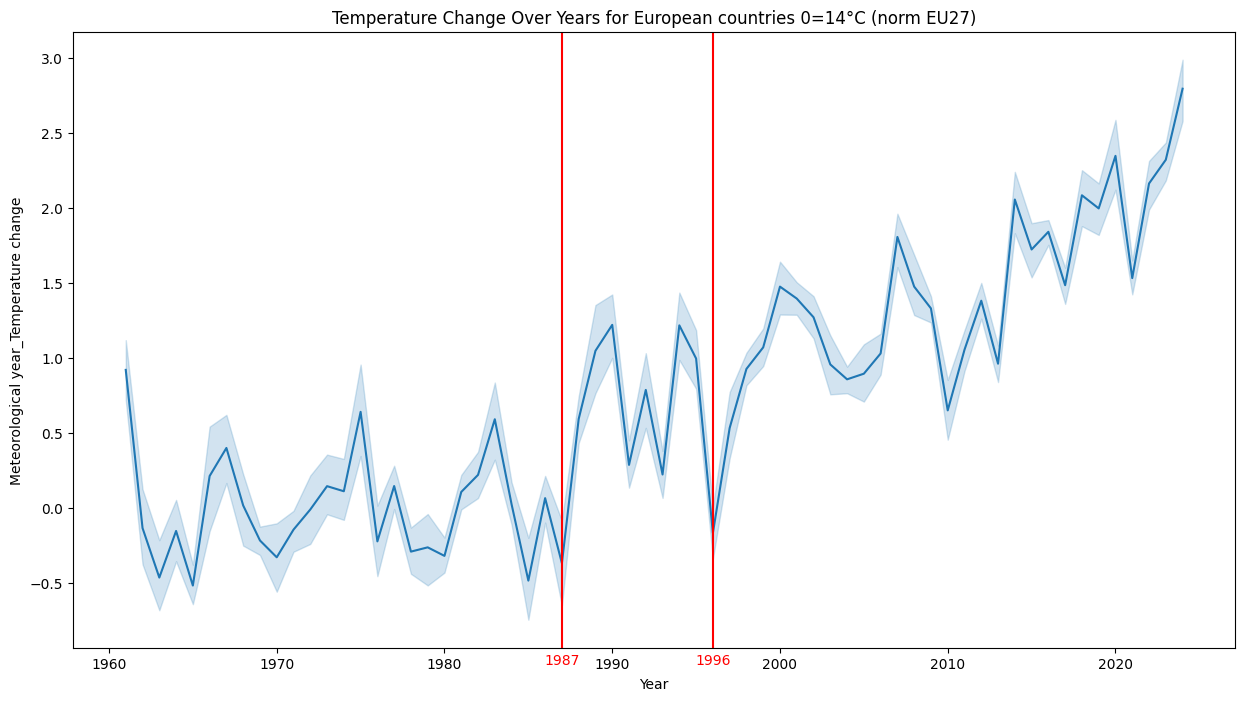

Temp change mean < 1987: 0.001
Temp change median < 1987: -0.024
Temp change mean between 1987-1996: 0.585
Temp change median between 1987-1996: 0.562
Temp change mean > 1996: 1.483
Temp change median aft>er 1996: 1.432


In [8]:
#Plotting the temperature change
plt.figure(figsize=(15, 8))
sns.lineplot(x="Year", y="Meteorological year_Temperature change", data=df_restricted)
plt.axvline(x=1987, color='red', linestyle='-') 
plt.axvline(x=1996, color='red', linestyle='-') 

#Add X legend
ax = plt.gca()  # Find the actual x axis
ax.text(1987, -0.01, '1987', transform=ax.get_xaxis_transform(),
        ha='center', va='top', color='red')
ax.text(1996, -0.01, '1996', transform=ax.get_xaxis_transform(),
        ha='center', va='top', color='red')

# Add labels
plt.xlabel('Year')
plt.ylabel('Meteorological year_Temperature change')
plt.title('Temperature Change Over Years for European countries 0=14°C (norm EU27)')

plt.show()

#Splitting into the 3 periods to show 
pre_1987 = df_restricted[df_restricted['Year']<1987]
df_1987_1996 = df_restricted[df_restricted['Year'].between(1987,1996)]
post_1996 = df_restricted[df_restricted['Year']>1996]

print('Temp change mean < 1987:' ,round(pre_1987['Meteorological year_Temperature change'].mean(),3))
print('Temp change median < 1987:' ,round(pre_1987['Meteorological year_Temperature change'].median(),3))
print('Temp change mean between 1987-1996:' ,round(df_1987_1996['Meteorological year_Temperature change'].mean(),3))
print('Temp change median between 1987-1996:' ,round(df_1987_1996['Meteorological year_Temperature change'].median(),3))
print('Temp change mean > 1996:' ,round(post_1996['Meteorological year_Temperature change'].mean(),3))
print('Temp change median aft>er 1996:' ,round(post_1996['Meteorological year_Temperature change'].median(),3))

The feature temperature has huge fluctuations throughout the year, which reveals distinct climate change points. Based on visible trend shifts, we can slice it into three periods:
Between 1960 and 1987, the temperature change seems to stay stable; the median informs us that in some years the temperature was colder.
Between 1987 and 1996, the average was 0.577 °C, and the median was 0.555 °c. This period shows a climate change point where warmer years become more frequent.
Between 1996 and now, temperatures have skyrocketed; the average temperature change has risen to 1.47°C, and the median to 1.42°c. Both values are close, indicating a symmetrical and stable warmer distribution.

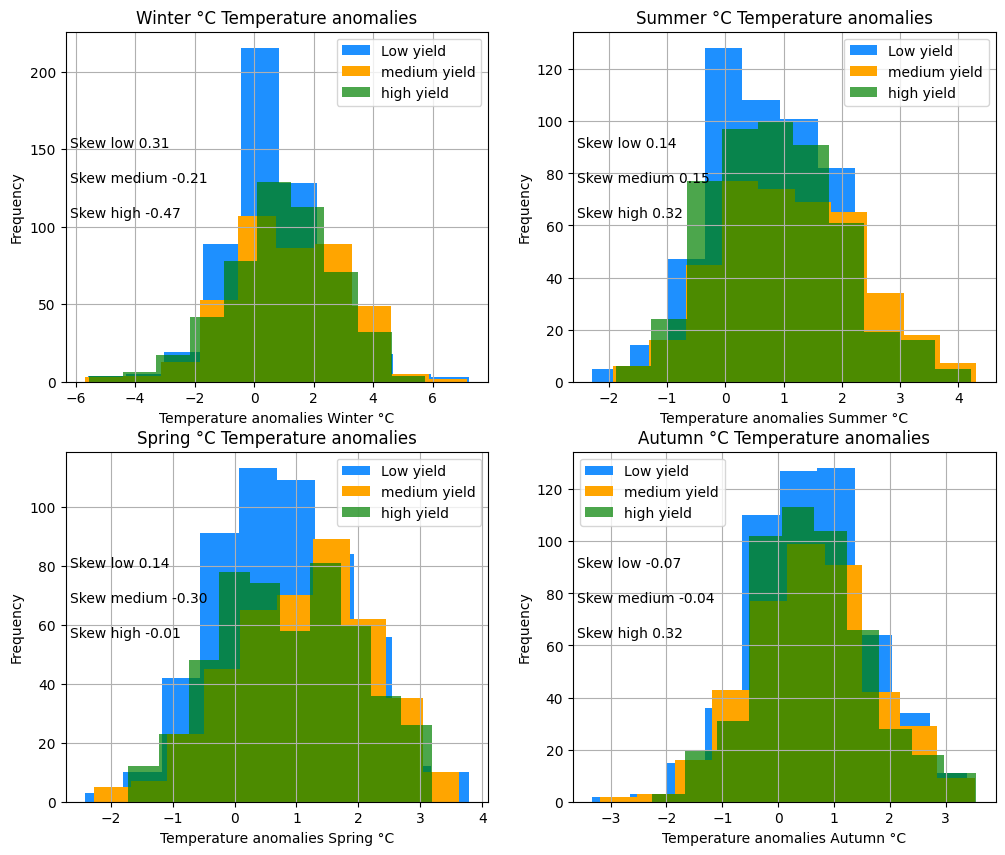

In [9]:
# Histogramm of seasonal temperature anomalies and skewness
plt.figure(figsize=(12,10))
for i,season in enumerate(['Winter °C','Summer °C','Spring °C','Autumn °C']):
    plt.subplot(2,2,i+1)
    low_yields[season].hist(label='Low yield',color='dodgerblue',alpha=1)
    medium_yields[season].hist(label='medium yield',color='orange',alpha=1)
    high_yields[season].hist(label='high yield',color='green',alpha=0.7)
    plt.legend()
    plt.xlabel("Temperature anomalies "+ season)
    plt.ylabel("Frequency")
    plt.title(season +" Temperature anomalies")
    plt.text(0.01, 0.7,f"Skew low {low_yields[season].skew():.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.01, 0.6,f"Skew medium {medium_yields[season].skew():.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.01, 0.5,f"Skew high {high_yields[season].skew():.2f}", ha='left', va='top', transform=plt.gca().transAxes)

As we can see with this histogram, we can split our study into 3 different yield categories high, medium,low and try to understand which factors contribute to improving yield

In [10]:
%%capture
# Create a new DataFrame to combine both high and low yield data for seasons
high_yields['Yield Category'] = 'High Yield'
medium_yields['Yield Category'] = 'Medium Yield'
low_yields['Yield Category'] = 'Low Yield'
combined_df = pd.concat([
    low_yields[['Summer °C', 'Winter °C', 'Spring °C', 'Autumn °C', 'Yield Category']],
    medium_yields[['Summer °C', 'Winter °C', 'Spring °C', 'Autumn °C', 'Yield Category']],
    high_yields[['Summer °C', 'Winter °C', 'Spring °C', 'Autumn °C', 'Yield Category']],
])

# Melt the DataFrame to have seasons as a single column
melted_df = pd.melt(combined_df, id_vars=['Yield Category'], var_name='Season', value_name='Temperature')

# Create side-by-side boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='Season', y='Temperature', hue='Yield Category')
plt.title('Seasonal Temperature Distribution for each categories ')
plt.show()

### c. Correlation Temperature / Yield

In [11]:
#Try to find if the yields is correlated to the temperature
seasons = ['Summer °C','Winter °C','Spring °C','Autumn °C']

for i,season in enumerate(seasons):
    print("----- "+season+" -----")
    print('Pearson correlation for Low Yield',round(low_yields[season].corr(low_yields['Yield (kg/ha)'],method='pearson'),3))
    print('Pearson correlation for Med Yield',round(medium_yields[season].corr(medium_yields['Yield (kg/ha)'],method='pearson'),3))
    print('Pearson correlation for High Yield',round(high_yields[season].corr(high_yields['Yield (kg/ha)'],method='pearson'),3))

----- Summer °C -----
Pearson correlation for Low Yield 0.371
Pearson correlation for Med Yield 0.469
Pearson correlation for High Yield 0.415
----- Winter °C -----
Pearson correlation for Low Yield 0.313
Pearson correlation for Med Yield 0.379
Pearson correlation for High Yield 0.305
----- Spring °C -----
Pearson correlation for Low Yield 0.34
Pearson correlation for Med Yield 0.239
Pearson correlation for High Yield 0.41
----- Autumn °C -----
Pearson correlation for Low Yield 0.313
Pearson correlation for Med Yield 0.367
Pearson correlation for High Yield 0.343


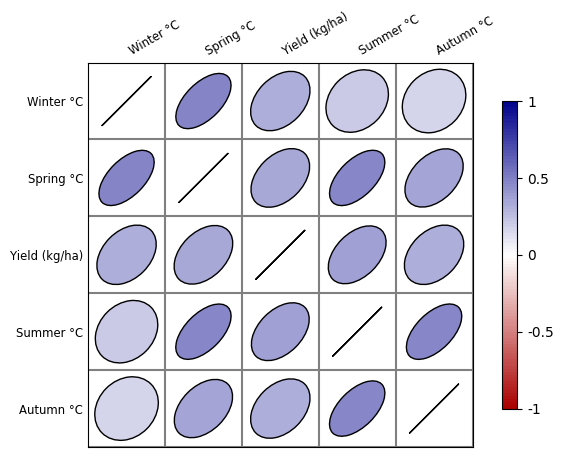

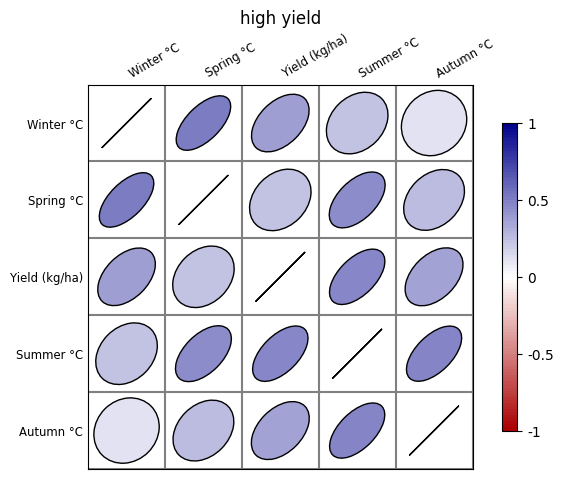

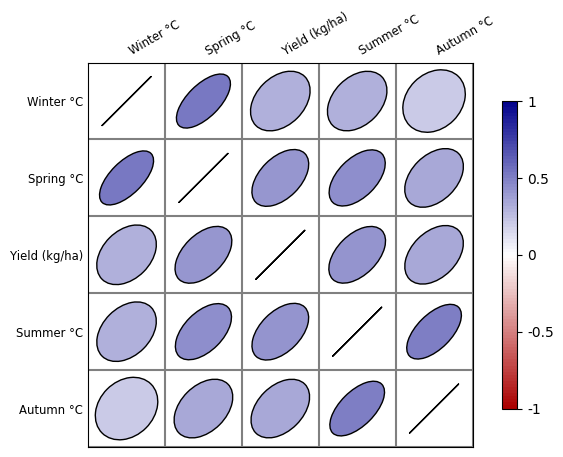

In [12]:
c = corrplot.Corrplot(low_yields.drop(columns=["Area","Yield Category"]).corr())
c.plot()

c = corrplot.Corrplot(medium_yields.drop(columns=["Area","Yield Category"]).corr())
c.plot()

c = corrplot.Corrplot(high_yields.drop(columns=["Area","Yield Category"]).corr())
#c.plot()
plt.title('high yield')
c.plot()

## III.2 Rainfall

### a. Preprocessing

In [13]:
df = pd.read_csv('/work/dataset.csv')

#Divide the dataset in 3 groups
df_low_yields=df[df['Area'].isin(low_yield_coutries)]
df_medium_yields=df[df['Area'].isin(medium_yield_coutries)]
df_high_yields=df[df['Area'].isin(high_yield_coutries)]

#Restrict the dataframe for mono analysis
restricted_columns = ['Area','Year','Rain (mm/year)','Yield (kg/ha)']
df = df[restricted_columns]
# Create a new DataFrame to combine both high and low yield data for seasons
df_low_yields['Yield Category'] = 'Low Yield'
df_medium_yields['Yield Category'] = 'Medium Yield'
df_high_yields['Yield Category'] = 'High Yield'
combined_df = pd.concat([df_low_yields, df_medium_yields, df_high_yields])

### b. Exploratory data Analysis

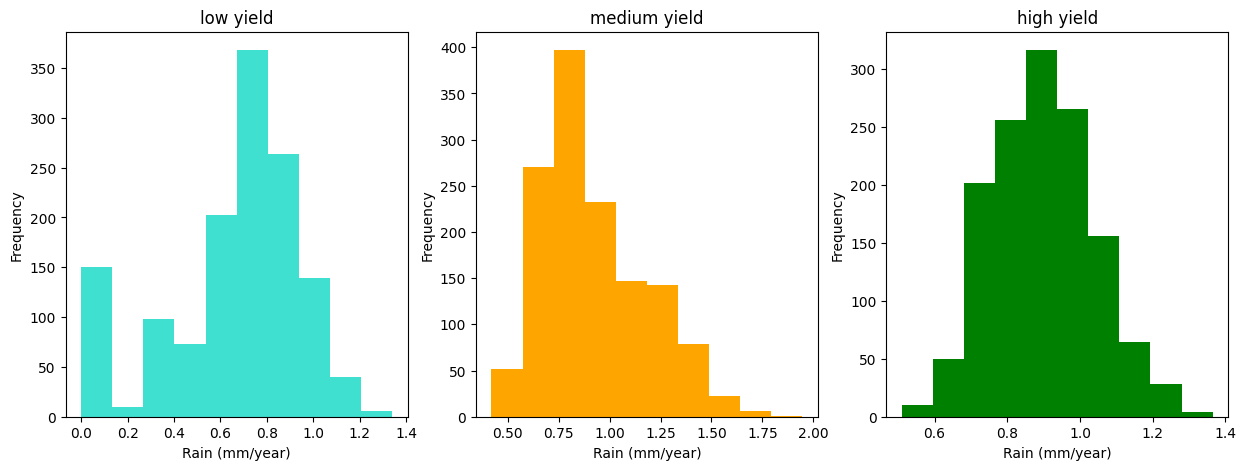

In [14]:
plt.figure(figsize=(15,5))
df_list = [df_low_yields,df_medium_yields,df_high_yields]
df_name=["low yield","medium yield","high yield"]
df_color = ["turquoise","orange","green"]
for i,df_curr in enumerate(df_list):
    plt.subplot(1,3,i+1)
    plt.hist(df_curr["Rain (mm/year)"],color=df_color[i])
    plt.title(df_name[i])
    plt.xlabel("Rain (mm/year)")
    plt.ylabel("Frequency")
plt.show()

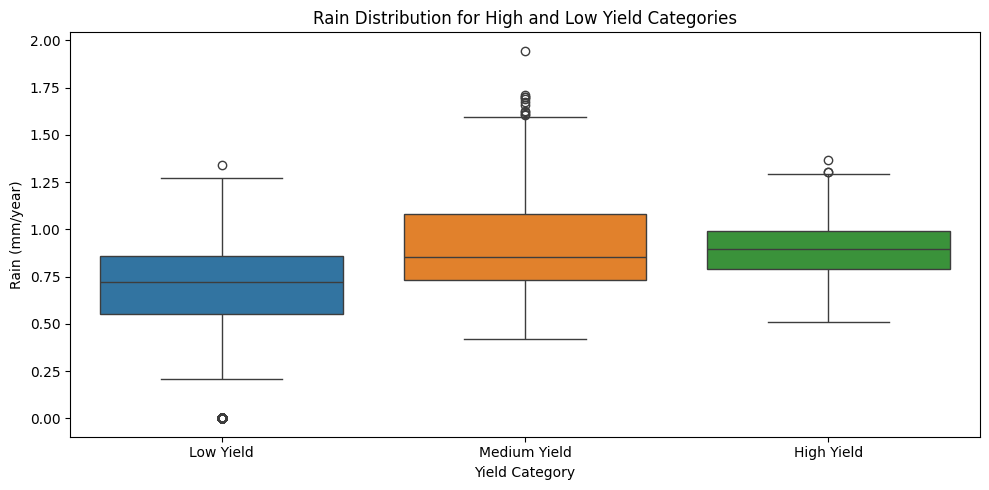

In [15]:
# Create side-by-side boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=combined_df, x="Yield Category", y='Rain (mm/year)', hue='Yield Category')
plt.title('Rain Distribution for High and Low Yield Categories')
plt.tight_layout()
plt.show()

## c. Correlation Temperature / Rainfall

In [16]:
df = pd.read_csv('/work/dataset.csv')
#Restrict the dataframe for mono analysis
restricted_columns = ['Area','Year','Rain (mm/year)','Yield (kg/ha)','Winter °C','Spring °C','Summer °C','Autumn °C']
df = df[restricted_columns]

#Divide the dataset in 3 groups
df_low_yields=df[df['Area'].isin(low_yield_coutries)]
df_medium_yields=df[df['Area'].isin(medium_yield_coutries)]
df_high_yields=df[df['Area'].isin(high_yield_coutries)]

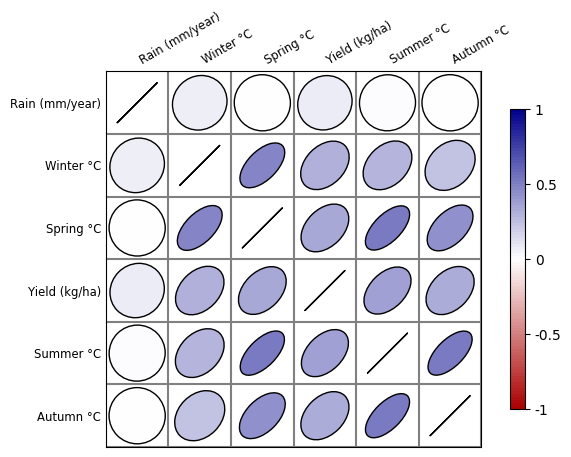

In [17]:
c = corrplot.Corrplot(df_low_yields.drop(columns=["Area","Year"]).corr("spearman"))
c.plot()

# IV. Agricultural practices features 

## IV.1 Fertilizer

### a. Preprocessing 

In [18]:
# Load only relevant columns for fertilizer and yield
data_fert = pd.read_csv("dataset.csv", usecols=[
    "Area", "Year",
    "Use/cropland(kg/ha)_N",
    "Use/cropland(kg/ha)_P2O5",
    "Use/cropland(kg/ha)_K2O",
    "Yield (kg/ha)"
], encoding="utf-8", sep=",", quotechar='"')

# Rename columns for convenience
data_fert.rename(columns={
    "Use/cropland(kg/ha)_N": "fertilizer_n",
    "Use/cropland(kg/ha)_P2O5": "fertilizer_p",
    "Use/cropland(kg/ha)_K2O": "fertilizer_k",
    "Yield (kg/ha)": "yield"
}, inplace=True)

# Create total fertilizer per hectare
data_fert["fertilizer_total"] = data_fert["fertilizer_n"] + data_fert["fertilizer_p"] + data_fert["fertilizer_k"]

# Drop rows where all fertilizer components are missing
data_fert.dropna(subset=["fertilizer_n", "fertilizer_p", "fertilizer_k"], how='all', inplace=True)

# Drop rows where yield is missing
data_fert.dropna(subset=["yield"], inplace=True)

data_fert.head()

,Area,Year,yield,fertilizer_n,fertilizer_p,fertilizer_k,fertilizer_total
10,Austria,1961,2580.2,26.84,51.42,50.80,129.06
11,Austria,1962,2612.2,33.11,59.46,57.01,149.58
12,Austria,1963,2509.9,35.69,65.73,69.06,170.48
13,Austria,1964,2652.4,38.31,65.91,76.65,180.87
14,Austria,1965,2396.9,47.55,68.27,73.39,189.21


### b. Exploratory Data Analysis

How fertilizer use changes over years

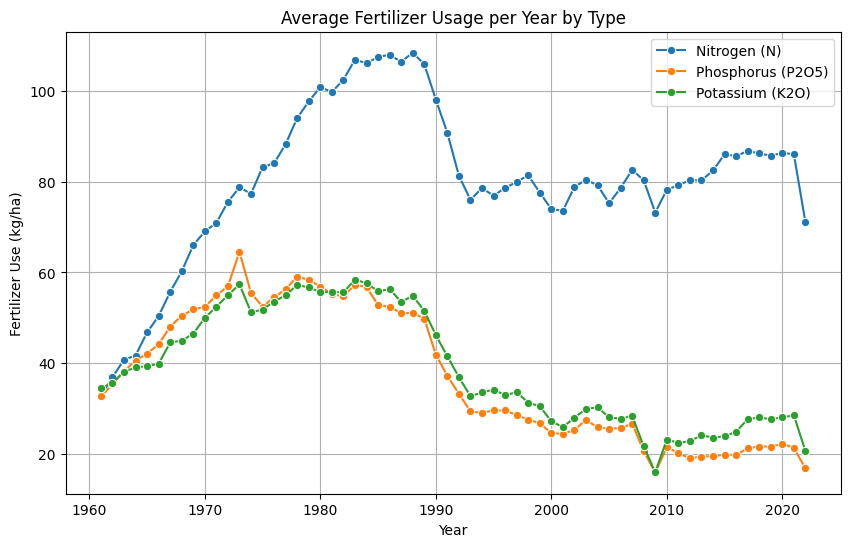

In [19]:
# Aggregate average fertilizer use per year for each type
fert_per_year_types = data_fert.groupby('Year').agg({
    'fertilizer_n': 'mean',
    'fertilizer_p': 'mean',
    'fertilizer_k': 'mean'
}).reset_index()

plt.figure(figsize=(10,6))

sns.lineplot(data=fert_per_year_types, x='Year', y='fertilizer_n', marker='o', label='Nitrogen (N)')
sns.lineplot(data=fert_per_year_types, x='Year', y='fertilizer_p', marker='o', label='Phosphorus (P2O5)')
sns.lineplot(data=fert_per_year_types, x='Year', y='fertilizer_k', marker='o', label='Potassium (K2O)')

plt.title('Average Fertilizer Usage per Year by Type')
plt.ylabel('Fertilizer Use (kg/ha)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

Yield differences between high and low fertilizer groups


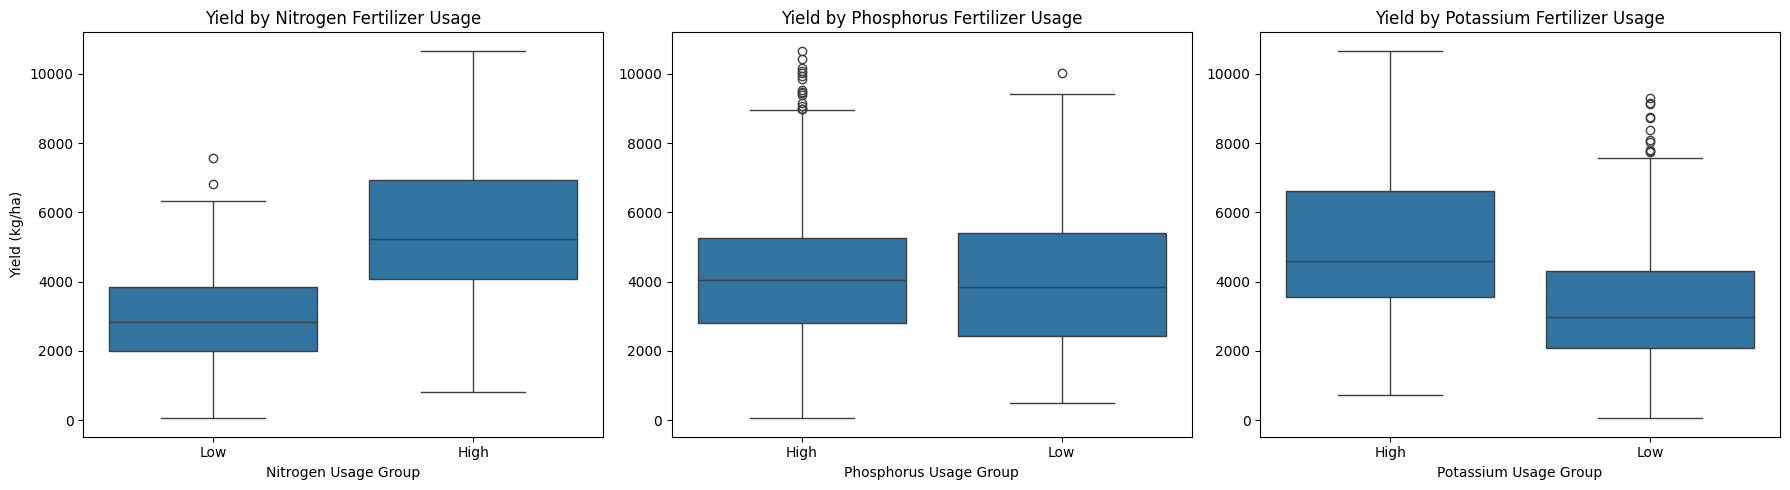

In [20]:
# Step 1: Compute medians and create group columns
fertilizers = {
    'fertilizer_n': 'Nitrogen',
    'fertilizer_p': 'Phosphorus',
    'fertilizer_k': 'Potassium'
}

for fert_col in fertilizers:
    median_val = data_fert[fert_col].median()
    group_col = f"{fert_col}_group"
    data_fert[group_col] = data_fert[fert_col].apply(lambda x: 'High' if x >= median_val else 'Low')

# Step 2: Plot using a loop
plt.figure(figsize=(18, 5))

for i, (fert_col, fert_name) in enumerate(fertilizers.items(), start=1):
    group_col = f"{fert_col}_group"
    plt.subplot(1, 3, i)
    sns.boxplot(x=group_col, y='yield', data=data_fert)
    plt.title(f'Yield by {fert_name} Fertilizer Usage')
    plt.xlabel(f'{fert_name} Usage Group')
    plt.ylabel('Yield (kg/ha)' if i == 1 else '')

plt.tight_layout()
plt.show()

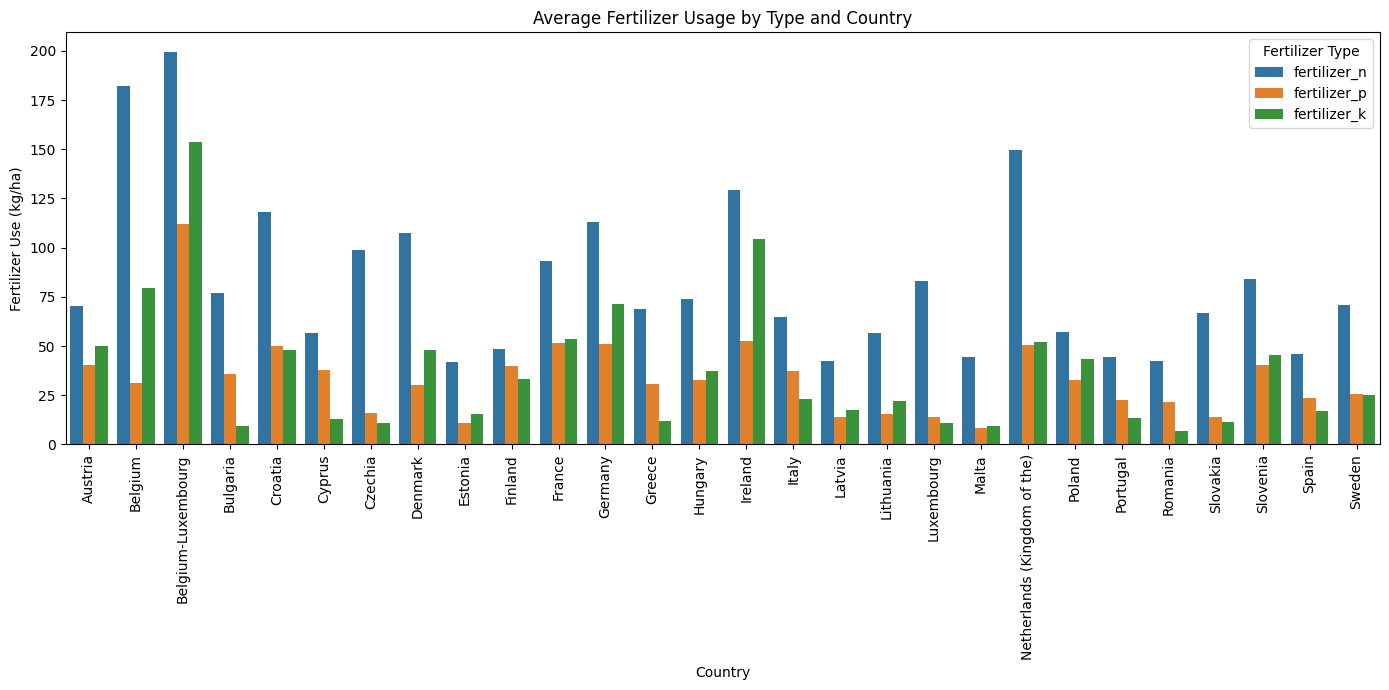

In [21]:
# Group by country and calculate mean for each fertilizer type
fert_per_country = data_fert.groupby('Area').agg({
    'fertilizer_n': 'mean',
    'fertilizer_p': 'mean',
    'fertilizer_k': 'mean'
}).reset_index()
fert_long = fert_per_country.melt(id_vars='Area', 
                                 value_vars=['fertilizer_n', 'fertilizer_p', 'fertilizer_k'],
                                 var_name='Fertilizer_Type',
                                 value_name='Average_Usage')
plt.figure(figsize=(14,7))
sns.barplot(data=fert_long, x='Area', y='Average_Usage', hue='Fertilizer_Type')
plt.xticks(rotation=90)
plt.title('Average Fertilizer Usage by Type and Country')
plt.ylabel('Fertilizer Use (kg/ha)')
plt.xlabel('Country')
plt.legend(title='Fertilizer Type', loc='upper right')
plt.tight_layout()
plt.show()


### c. Correlation between fertilizer and yield

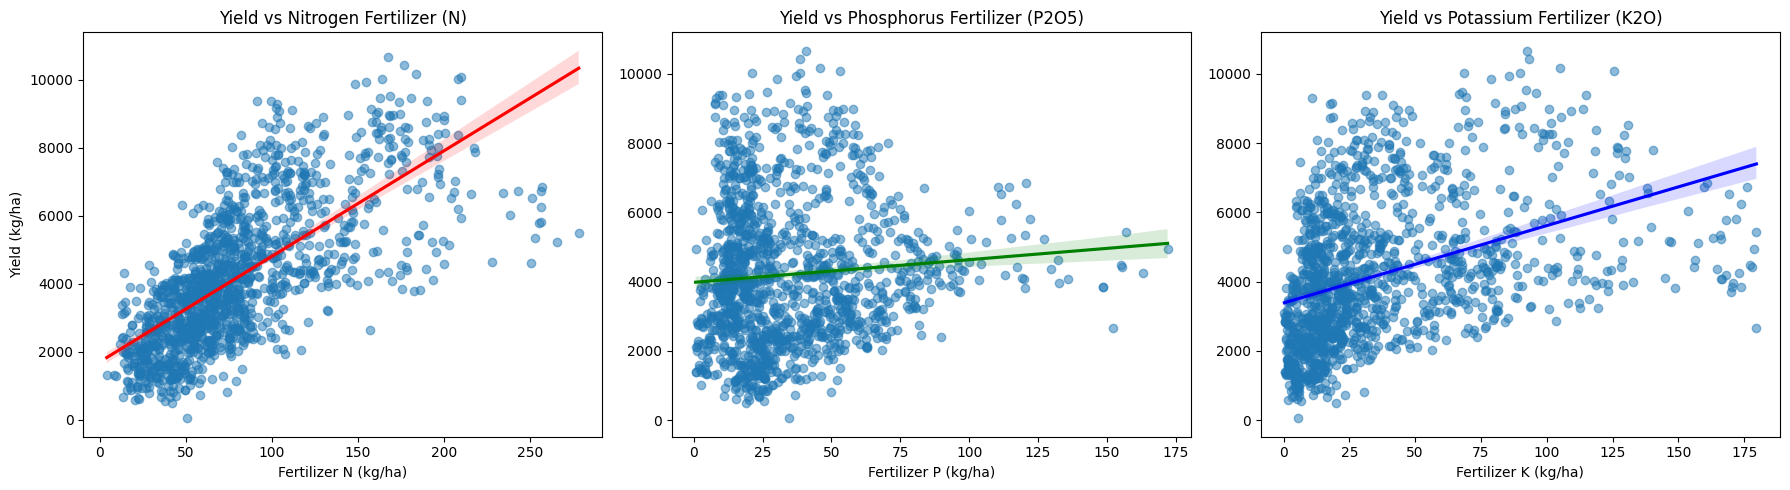

In [22]:
# Plot settings
plt.figure(figsize=(18, 5))
# Define fertilizers and their labels/colors
fertilizers = [
    ('fertilizer_n', 'Fertilizer N (kg/ha)', 'red', 'Yield vs Nitrogen Fertilizer (N)'),
    ('fertilizer_p', 'Fertilizer P (kg/ha)', 'green', 'Yield vs Phosphorus Fertilizer (P2O5)'),
    ('fertilizer_k', 'Fertilizer K (kg/ha)', 'blue', 'Yield vs Potassium Fertilizer (K2O)')
]
# Loop through each subplot
for i, (fert_col, xlabel, color, title) in enumerate(fertilizers, start=1):
    plt.subplot(1, 3, i)
    sns.regplot(
        data=data_fert,
        x=fert_col,
        y='yield',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': color}
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Yield (kg/ha)' if i == 1 else '')

plt.tight_layout()
plt.show()


## IV.2 Pesticides

### a. Preprocessing

In [23]:
#Loading in the data and adding labels
#Load in columns and delete empty rows
data_pest= pd.read_csv("dataset.csv", usecols=["Overall_Pesticides/ha","Area","Year", "Insecticides", "Herbicides (t)", "Fung & Bact (t)", "Plant Growth Regulators (t)", 'Ins_(t/m2)', 'Herb_(t/m2)', 'Fung_(t/m2)', 'Plant_(t/m2)', "Yield (kg/ha)", "Area harvested (ha)"],encoding="utf-8",sep=",",quotechar='"')
data_pest.dropna(subset=["Insecticides", "Herbicides (t)", "Fung & Bact (t)", "Plant Growth Regulators (t)"], how='all', inplace=True)
#creating generally useful lists of labels
colors=["purple", "green", "brown", "blue", "orange"]
pest_labels = ['Insecticides', 'Herbicides (t)', 'Fung & Bact (t)', 'Plant Growth Regulators (t)']
parea_labels = ['Ins_(t/m2)', 'Herb_(t/m2)', 'Fung_(t/m2)', 'Plant_(t/m2)']
parea_labels2 = ['Ins_(t/m2)', 'Herb_(t/m2)', 'Fung_(t/m2)', 'Plant_(t/m2)', 'Overall_Pesticides/ha']

### b. Exploratory Data Analysis

Checking the overall usage of those substances

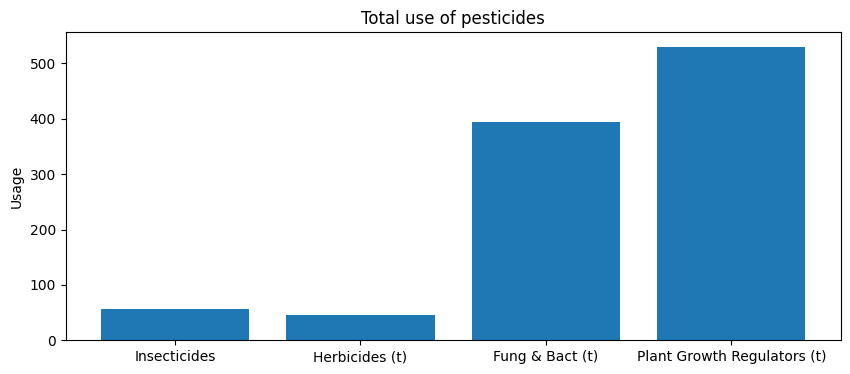

In [24]:
pest_values = [data_pest[l].mean() for l in pest_labels]
plt.figure(figsize=(10, 4))
plt.bar(pest_labels, pest_values)
plt.title("Total use of pesticides")
plt.ylabel("Usage")
plt.show()

Bar plot with Average pesticide use  per area of each country

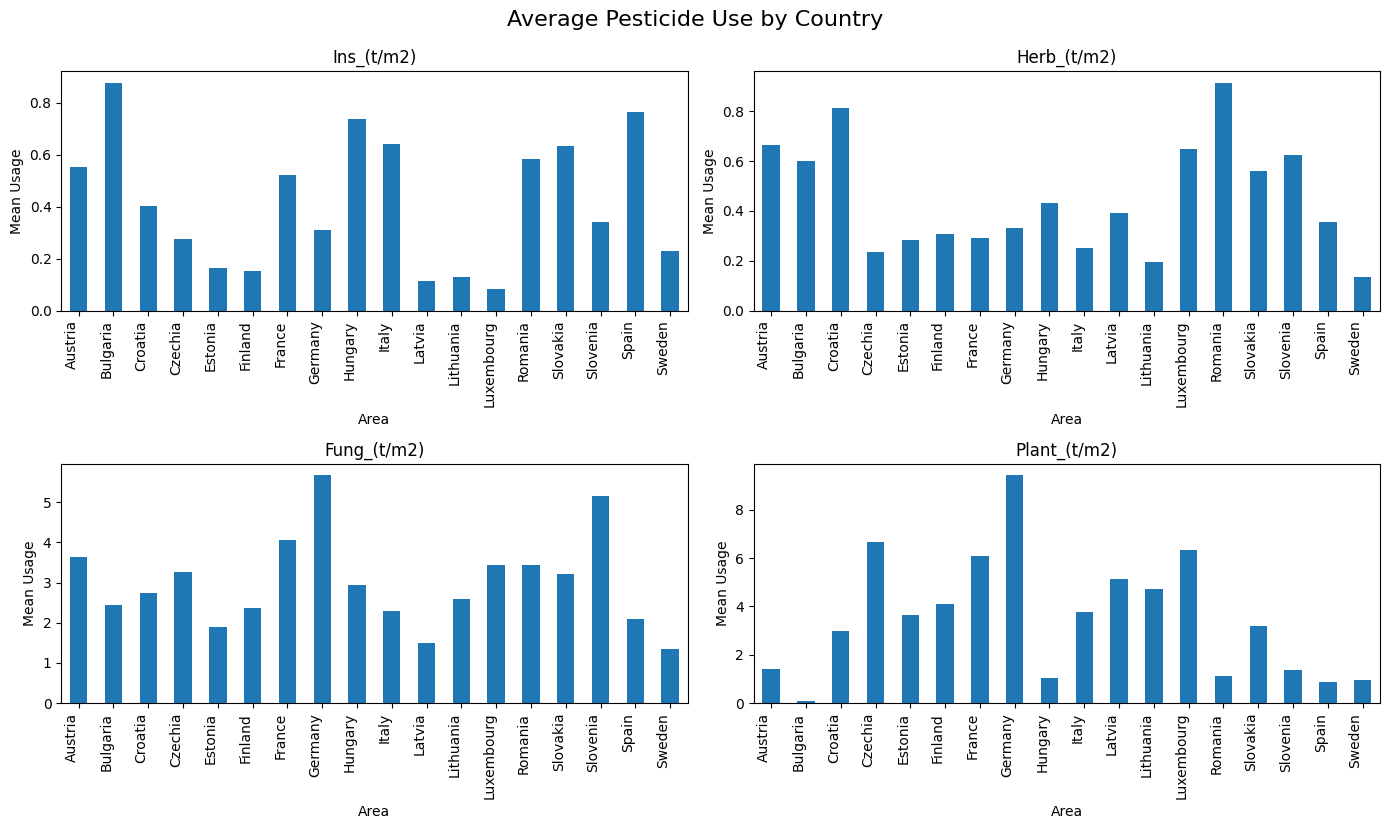

In [25]:
country_means=data_pest.groupby("Area").mean()
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()
for i, p in enumerate(parea_labels):
    ax = axes[i]
    country_means[p].plot(kind='bar', ax=ax)
    ax.set_title(p)
    ax.set_ylabel('Mean Usage')
    ax.set_xlabel("Area")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()
plt.suptitle("Average Pesticide Use by Country", fontsize=16, y=1.03)
plt.show()

Mean and Median Usage per ha across time

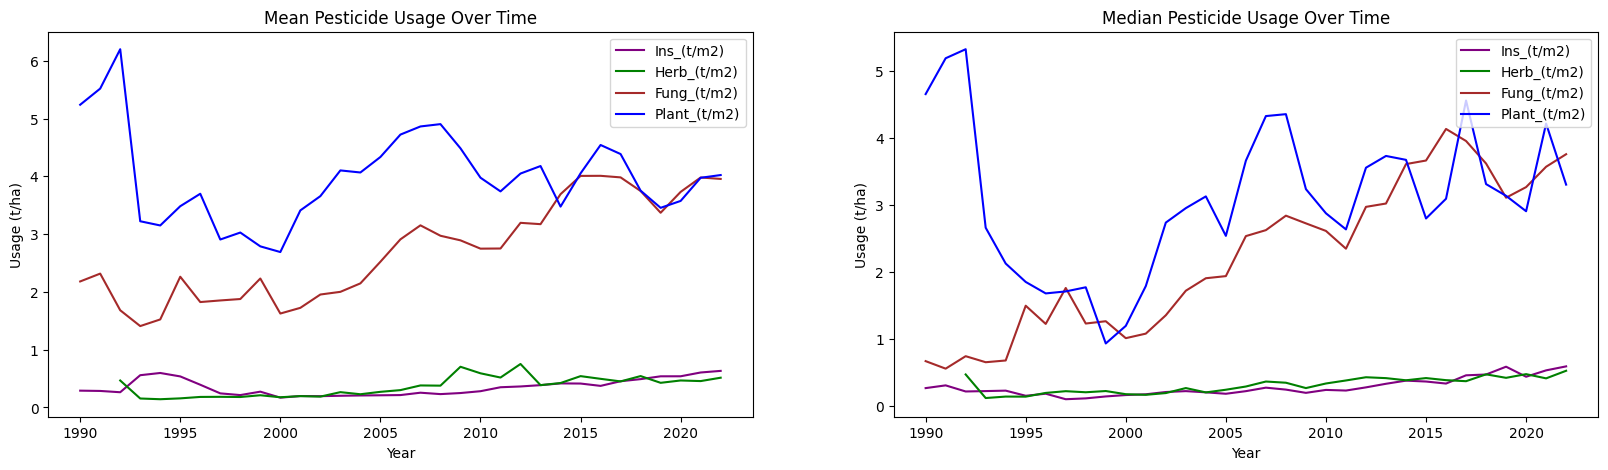

In [26]:
plt.figure(figsize=(20,5))

pes_mean_by_year = data_pest.groupby('Year')[parea_labels].mean()
pes_median_by_year = data_pest.groupby('Year')[parea_labels].median()

plt.subplot(1, 2, 1)
for i, p in enumerate(parea_labels):
    plt.plot(pes_mean_by_year.index, pes_mean_by_year[p], label=p, color=colors[i])
plt.title('Mean Pesticide Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Usage (t/ha)')
plt.legend()
plt.subplot(1, 2, 2)
for i, p in enumerate(parea_labels):
    plt.plot(pes_median_by_year.index, pes_median_by_year[p], label=p, color=colors[i])
plt.title('Median Pesticide Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Usage (t/ha)')
plt.legend()
plt.show()

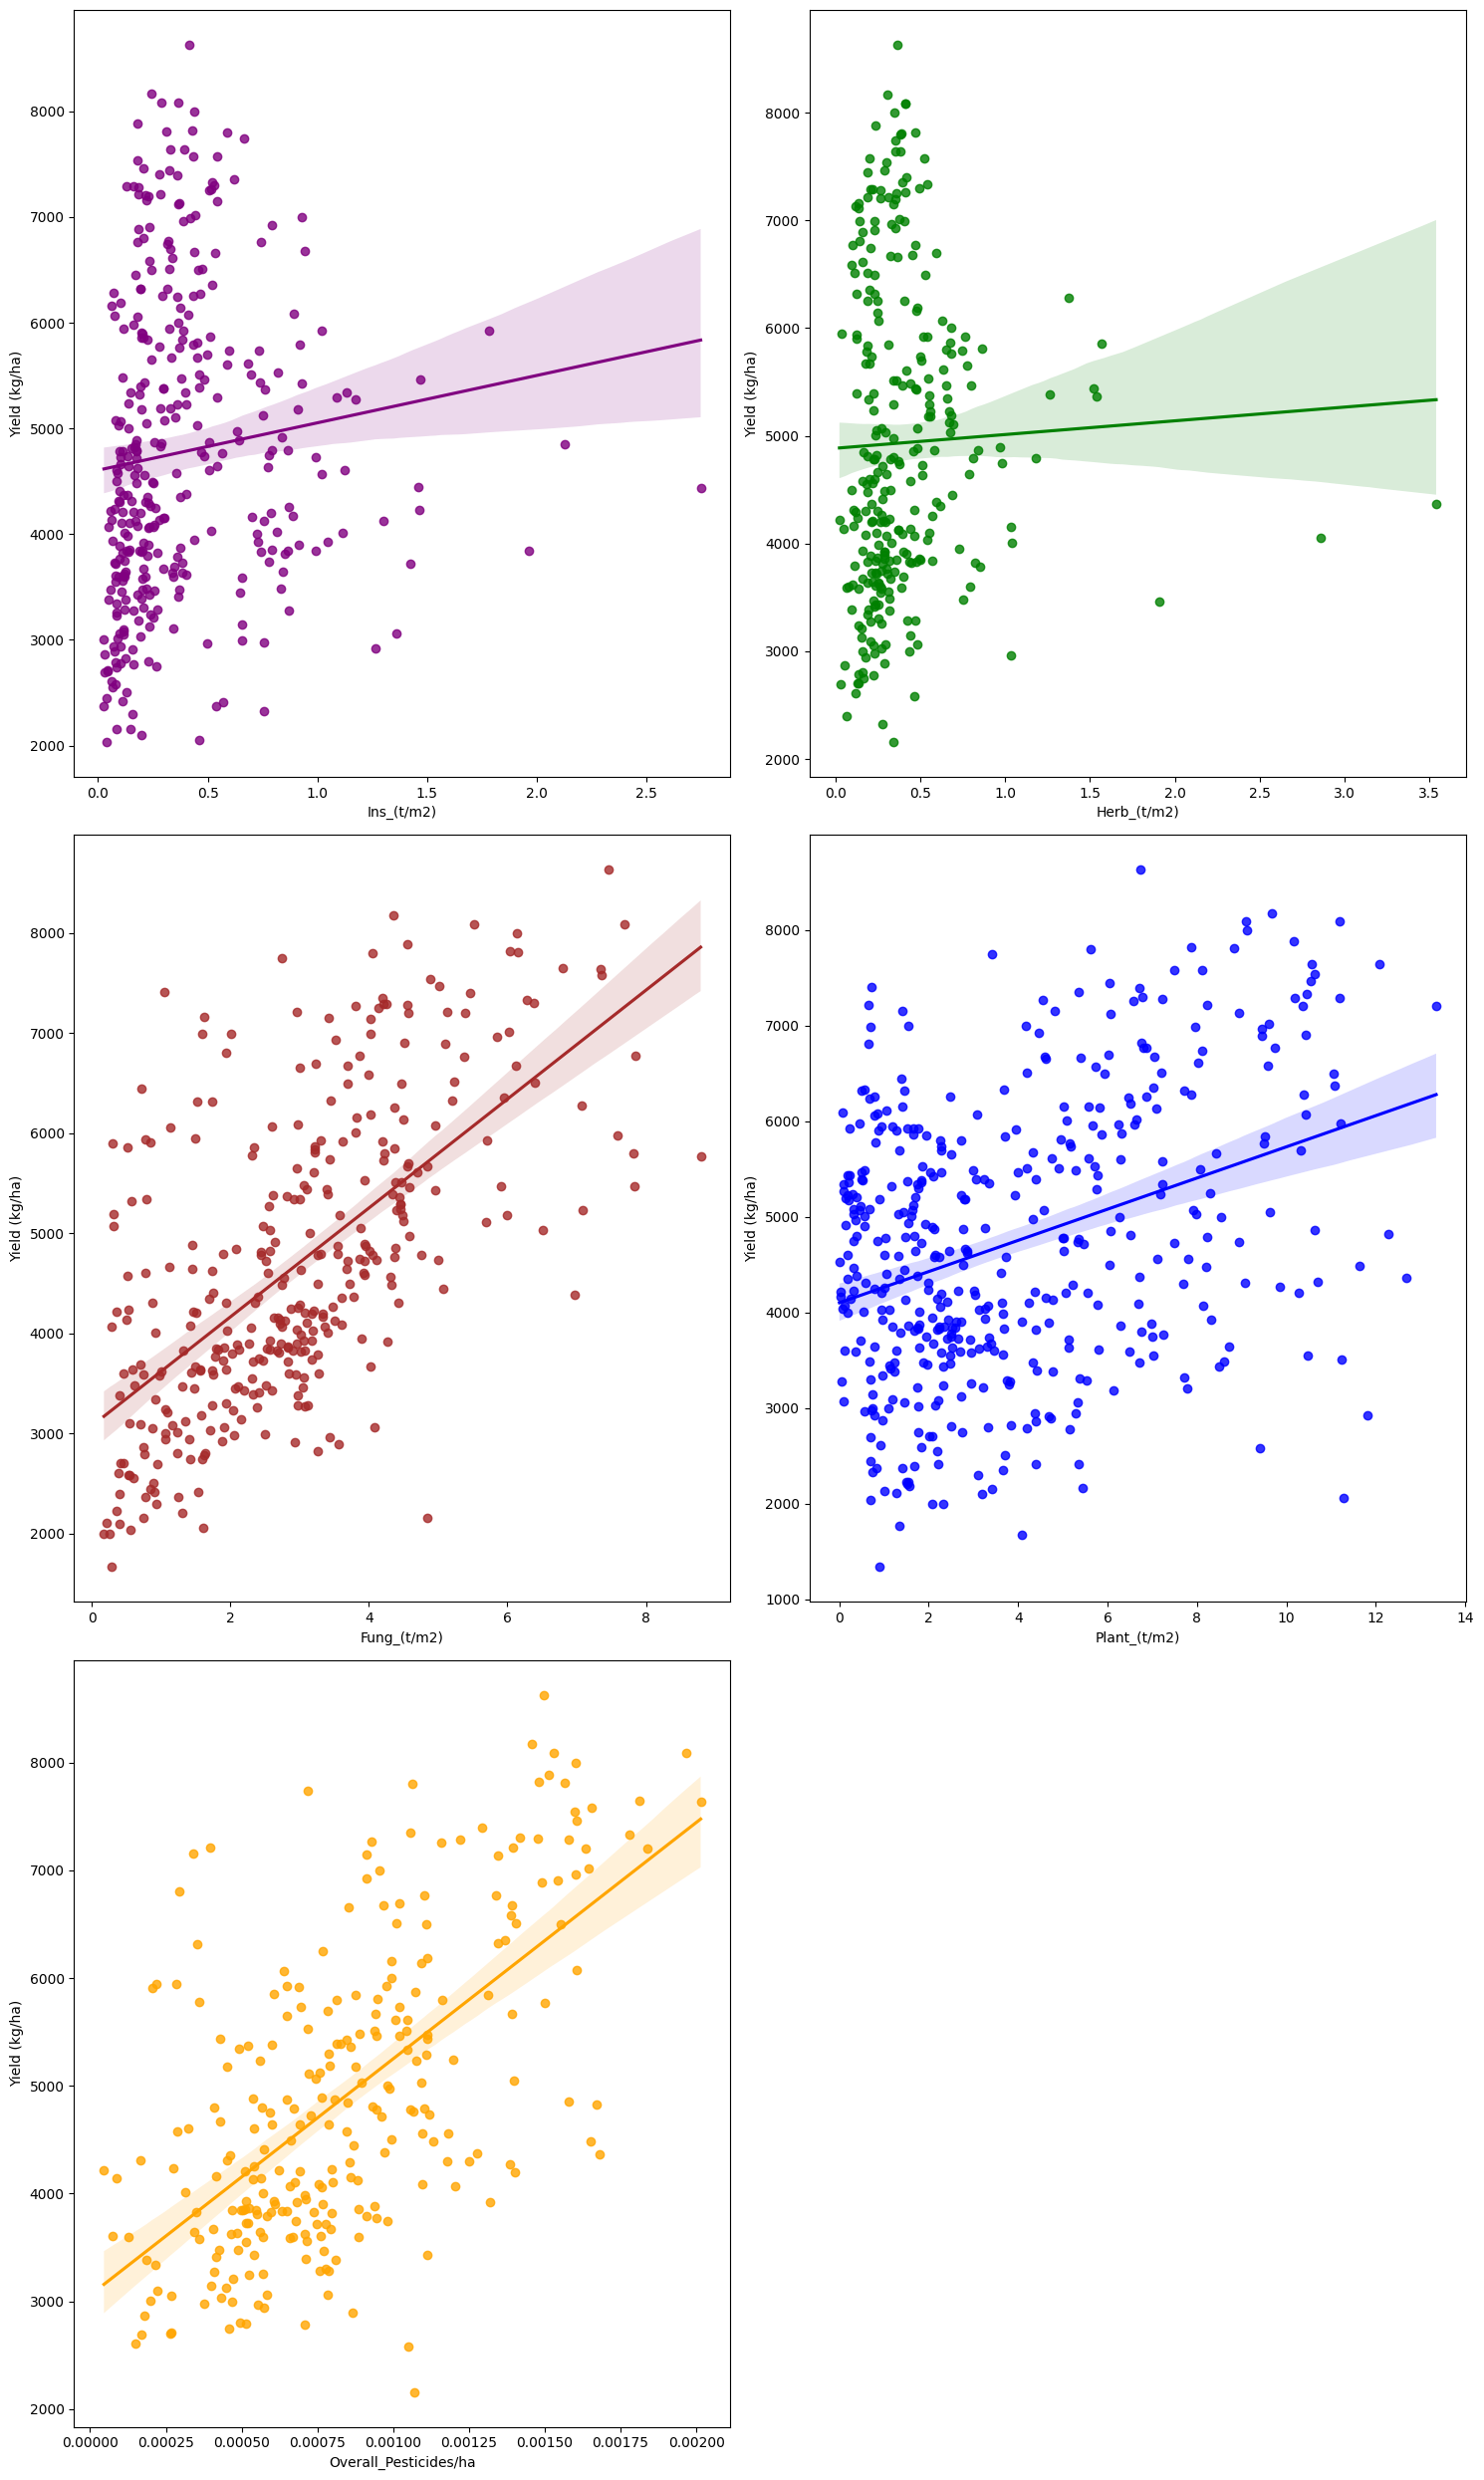

In [30]:
#Regression and joint plots for each group
plt.figure(figsize=(15, 25))
for i, p in enumerate(parea_labels2):
    plt.subplot(3, 2, i+1)
    sns.regplot(x=p, y='Yield (kg/ha)', color=colors[i], data=data_pest)
    plt.tight_layout()
plt.show()

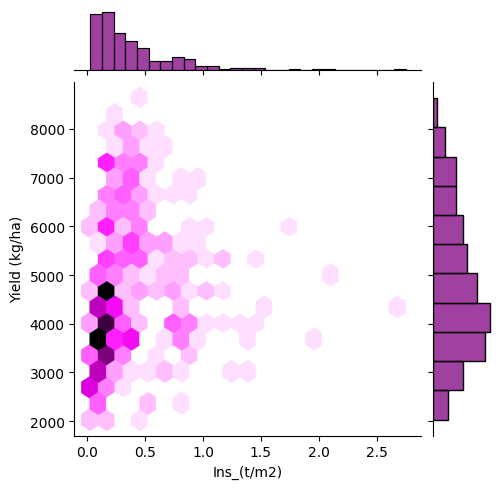

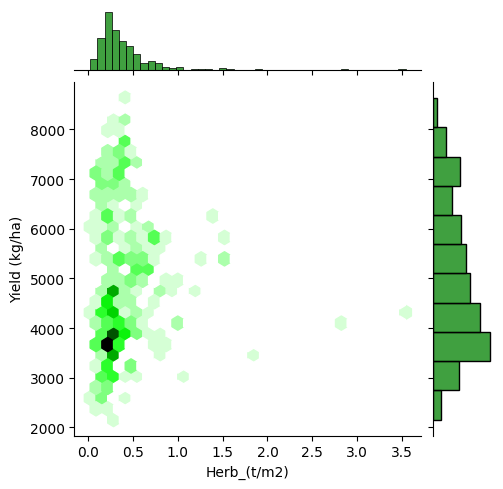

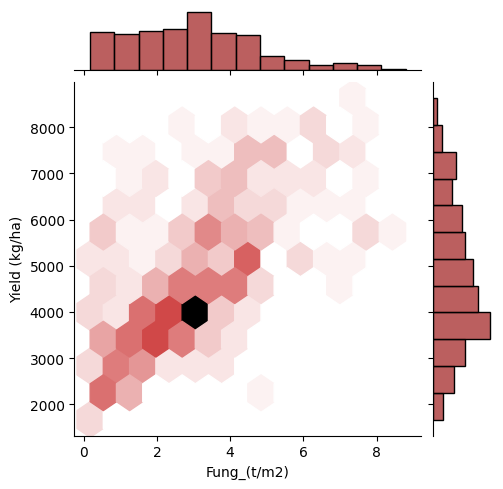

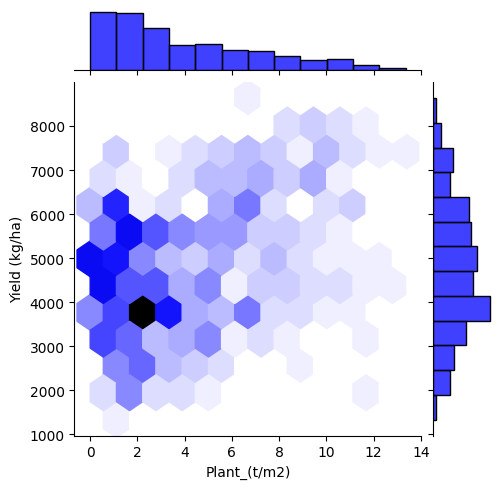

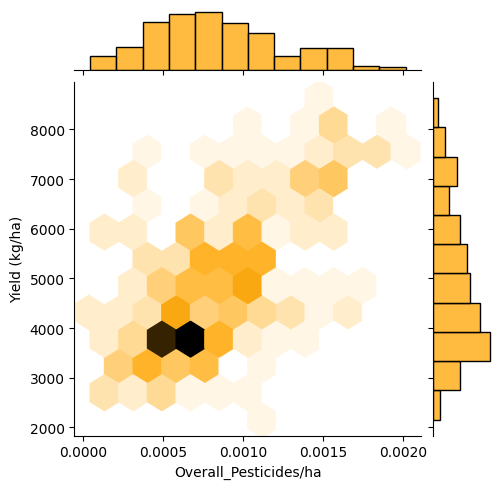

In [31]:
for i, p in enumerate(parea_labels2):
    sns.jointplot(
        x=p, y='Yield (kg/ha)', data=data_pest,
        kind='hex', color=colors[i], height=5
    )
    plt.title(f'{p} vs Yield (kg/ha)', y=1.03)
plt.show()

### c. Correlation between each pesticide type and yields

In [32]:
corr = []
for p in (parea_labels2):
    sub = data_pest[[p, 'Yield (kg/ha)']].dropna()
    pearson_corr = stats.pearsonr(sub[p], sub['Yield (kg/ha)'])[0]
    spearman_corr = stats.spearmanr(sub[p], sub['Yield (kg/ha)'])[0]
    corr.append([p, pearson_corr, spearman_corr])
corr = pd.DataFrame(corr, columns=['Pesticide', 'Pearson Correlation', 'Spearman Correlation'])
corr

/tmp/ipykernel_3683/2086891376.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  pearson_corr = stats.pearsonr(sub[p], sub['Yield (kg/ha)'])[0]
/tmp/ipykernel_3683/2086891376.py:5: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  spearman_corr = stats.spearmanr(sub[p], sub['Yield (kg/ha)'])[0]
/tmp/ipykernel_3683/2086891376.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  pearson_corr = stats.pearsonr(sub[p], sub['Yield (kg/ha)'])[0]
/tmp/ipykernel_3683/2086891376.py:5: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  spearman_corr = stats.spearmanr(sub[p], sub['Yield (kg/ha)'])[0]
/tmp/ipykernel_3683/2086891376.py:4: DeprecationWarning: Please use `pearsonr` from th

,Pesticide,Pearson Correlation,Spearman Correlation
0,Ins_(t/m2),0.108498,0.305046
1,Herb_(t/m2),0.031324,0.171248
2,Fung_(t/m2),0.630604,0.639219
3,Plant_(t/m2),0.351098,0.263430
4,Overall_Pesticides/ha,0.627356,0.591166


# V. Hypothesis testing

## V.1 Rainfall

### a. t-Test

H0: means of all 3 (low Yield, medium Yield and high Yieldd) countries are equal
H1: mean of higher yield is higher

We will use a t-test because we do not know about the variance of each group with difference variances therefore the variance is the sum of the other 2 samples 

In [33]:
#Hypethesis between low and medium
t, p = ttest_ind(df_low_yields["Rain (mm/year)"], df_medium_yields["Rain (mm/year)"],equal_var=False,nan_policy='omit',alternative='less')
print("-----hypothesis between LOW and MEDIUM-----")
print("t-statistic:", round(t,4))
print("p-value:", round(p,4))

#Hypethesis between medium and high
t, p = ttest_ind(df_medium_yields["Rain (mm/year)"], df_high_yields["Rain (mm/year)"],equal_var=False,nan_policy='omit',alternative='less')
print("-----hypothesis between MEDIUM and HIGH-----")
print("t-statistic:", round(t,4))
print("p-value:", round(p,4))

#Hypethesis between low and high
t, p = ttest_ind(df_low_yields["Rain (mm/year)"], df_high_yields["Rain (mm/year)"],equal_var=False,nan_policy='omit',alternative='less')
print("-----hypothesis between LOW and HIGH-----")
print("t-statistic:", round(t,4))
print("p-value:", round(p,4))

-----hypothesis between LOW and MEDIUM-----
t-statistic: -24.5542
p-value: 0.0
-----hypothesis between MEDIUM and HIGH-----
t-statistic: 2.7675
p-value: 0.9972
-----hypothesis between LOW and HIGH-----
t-statistic: -26.7946
p-value: 0.0


low yield countries have a significatively low average rainfall compared to the medium and high but we cannot say that medium countries have less rain than high yield countries

### b. Pre-processing Anova

In this step of our project, we want to find the quantitative variables that affect the yields. To do so we divide the variable "rain" in different groups in order to convert into a qualitative variable . We are going to make the very detailled step only for this feature

In [34]:
df = pd.read_csv('/work/dataset.csv')
#Restrict the dataframe for mono analysis
restricted_columns = ['Area','Year','Rain (mm/year)','Yield (kg/ha)','Winter °C','Spring °C','Summer °C','Autumn °C']
df = df[restricted_columns]

Convert rain into qualitative data

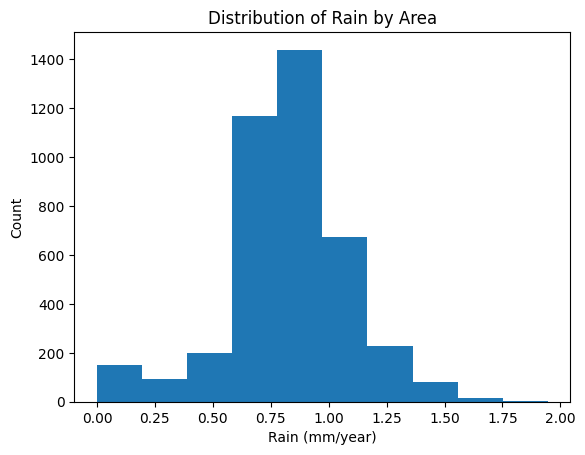

skewness: -0.64 ==> our dataset is moderately negatively skewed  


In [35]:
grouped_data = df.groupby("Area")["Rain (mm/year)"].mean().dropna()

plt.figure()
plt.hist(df["Rain (mm/year)"])
plt.xlabel('Rain (mm/year)')
plt.ylabel('Count')
plt.title('Distribution of Rain by Area')
plt.show()
print('skewness:',round(df['Rain (mm/year)'].skew(),3),'==> our dataset is moderately negatively skewed  ')

median: 0.8313107361985745
quantile 1/3: 0.7515164388485843 this defined the group of low yield countries
quantile 2/3: 0.9170245146811327 this defined the group of high yield countries


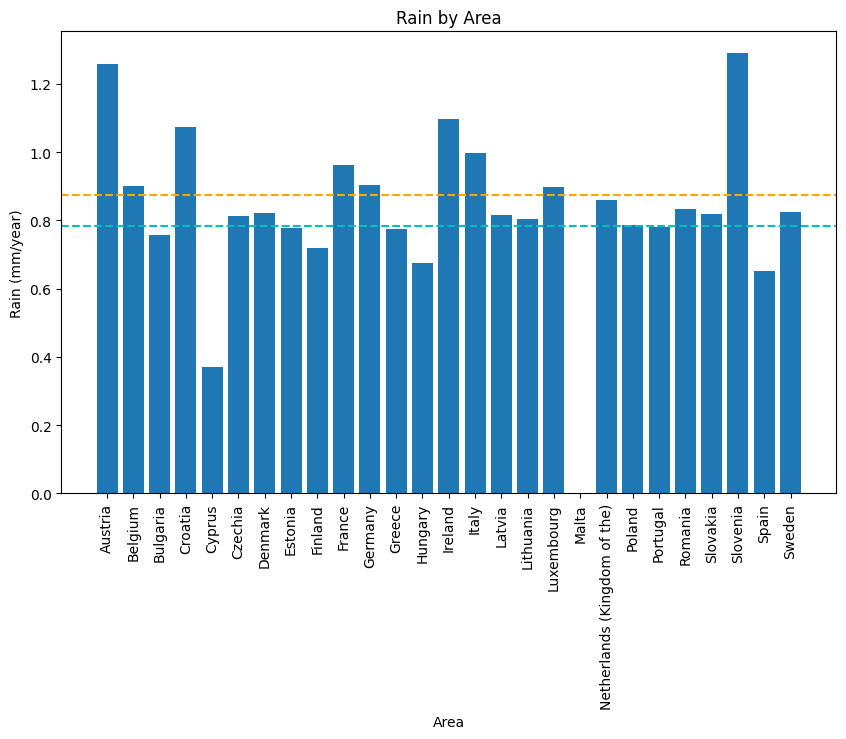

Low rain countries: ['Bulgaria' 'Cyprus' 'Estonia' 'Finland' 'Greece' 'Hungary' 'Malta'
 'Portugal' 'Spain']
Medium rain countries: ['Czechia' 'Denmark' 'Latvia' 'Lithuania' 'Netherlands (Kingdom of the)'
 'Poland' 'Romania' 'Slovakia' 'Sweden']
High rain countries: ['Austria' 'Belgium' 'Croatia' 'France' 'Germany' 'Ireland' 'Italy'
 'Luxembourg' 'Slovenia']


In [36]:
#Calcul of the quantile, median, mean in order to separate the differents countries according to rain level
print('median:',df['Rain (mm/year)'].median())
print('quantile 1/3:' ,df['Rain (mm/year)'].quantile(1/3),'this defined the group of low yield countries')
print('quantile 2/3:',df['Rain (mm/year)'].quantile(2/3),'this defined the group of high yield countries')
plt.figure(figsize=(10,6))

# Plotting the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Area')
plt.ylabel('Rain (mm/year)')
plt.title('Rain by Area')  # Fixed missing closing parenthesis
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

q1 = df.groupby("Area")['Rain (mm/year)'].mean().quantile(1/3)
q2 = df.groupby("Area")['Rain (mm/year)'].mean().quantile(2/3) 
plt.axhline(y=q1, color='c', linestyle='--')  
plt.axhline(y=q2, color='orange', linestyle='--')  

plt.show()

#Print the name of countries in each grup
low_rain_coutries = df.groupby("Area").filter(lambda x: x["Rain (mm/year)"].mean() <= q1)["Area"].unique()
medium_rain_coutries = df.groupby("Area").filter(lambda x: x["Rain (mm/year)"].mean() > q1 and x["Rain (mm/year)"].mean() <= q2)["Area"].unique()
high_rain_coutries = df.groupby("Area").filter(lambda x: x["Rain (mm/year)"].mean() > q2)["Area"].unique()

print('Low rain countries:',low_rain_coutries)
print('Medium rain countries:',medium_rain_coutries)
print('High rain countries:',high_rain_coutries)

In [37]:
%%capture
#Divide the rain dataset in 3 groups
df_low_rain=df[df['Area'].isin(low_rain_coutries)]#Coutains only the countries in the group low rain 
df_medium_rain=df[df['Area'].isin(medium_rain_coutries)]
df_high_rain=df[df['Area'].isin(high_rain_coutries)]

df_low_rain['Rain Categories'] = 'Low'
df_medium_rain['Rain Categories '] = 'Medium'
df_high_rain['Rain Categories '] = 'High'

We want to find the potential effect of the rain  factor (qualitative) on the response Yields (quantitative) ⇔ : Difference in the average response by group
H0: μ1=μ2=....=μI=μ  ∀𝑖=1,⋯,𝐼, 𝛼𝑖=0
H1 : ∃(𝑖,𝑖′) like μi ≠μ𝑖′
The ANOVA test has important assumptions that must be satisfied in order
for the associated p-value to be valid.
Low rain countries are ['Bulgaria' 'Cyprus' 'Estonia' 'Finland' 'Greece' 'Hungary' 'Malta'
 'Portugal' 'Spain']
Medium rain countries are ['Denmark' 'Latvia' 'Lithuania' 'Poland' 'Romania' 'Slovakia' 'Sweden'
 'Czech Republic' 'Netherlands']
High rain countries are ['Austria' 'Belgium' 'Croatia' 'France' 'Germany' 'Ireland' 'Italy'
 'Luxembourg' 'Slovenia']

In [38]:
x_low = df_low_rain.groupby('Area')["Yield (kg/ha)" ].mean()
x_medium=df_medium_rain.groupby('Area')["Yield (kg/ha)"].mean()
x_high=df_high_rain.groupby('Area')["Yield (kg/ha)"].mean()

x_low = x_low.dropna()
x_medium = x_medium.dropna()
x_high = x_high.dropna()

The samples are independent  ? 

We consider the three samples independent because we make three groups where each country appears in only one group. The groups are mutually exclusive, and there is no overlap in countries between them. Since the data were grouped this way by design, we assume independence.

Is each sample from a normally distributed population?

To find if our sample is from a normally distributed population, we can make a goodness-of-fit test : like the Shapiro-Wilk test Kolmogorov–Smirnov test.
The size of our sample is n(x_low)=9; n(x_medium)=7 (because we have 2 countries without data for the yields),n( x_high) =9 

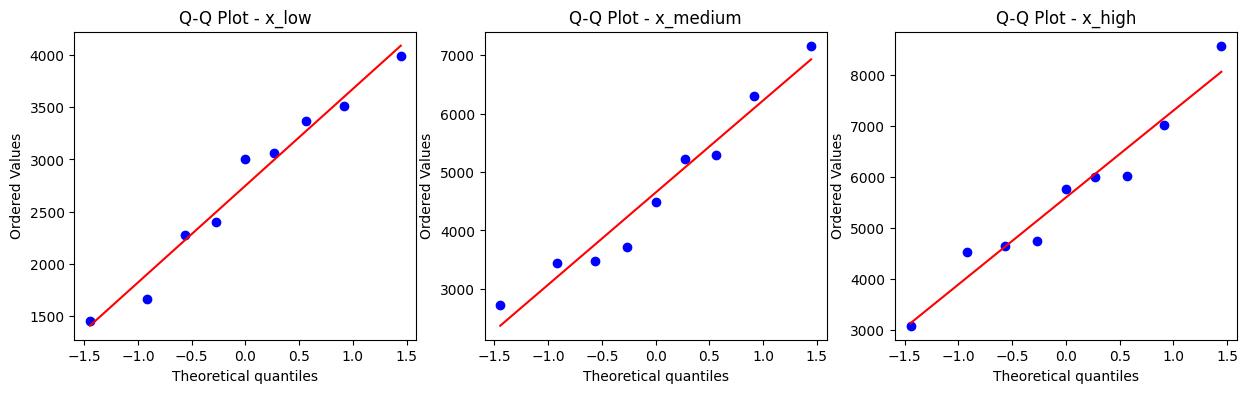

In [73]:
samples = [x_low, x_medium, x_high]
labels = ["x_low", "x_medium", "x_high"]
from scipy.stats import probplot
plt.figure(figsize=(15, 4))
for i, (sample, label) in enumerate(zip(samples, labels), start=1):
    plt.subplot(1, 3, i)
    probplot(sample, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot - {label}")

plt.show()

To be sure that our sample follows a normal distribution, we use the Shapiro-Wilks test ( because the size of our sample is small) and not categorical. 
H0 : "X_i. follow a normal distribution" ∀ 𝑖=low, medium,high
H1 : " X_i didn't follow a normal distribution"  

In [74]:
stat, p = shapiro(x_low)
print('Statistics=%.3f, p=%.3f' % (stat, p))#use format to have a sort of autocompketion
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.958, p=0.782
Sample looks Gaussian (fail to reject H0)


Since the p-value is higher than the significance level of 5% (𝛼 ), we can conclude that the x_low sample follows a Gaussian distribution.

In [75]:
stat, p = shapiro(x_medium)
print('Statistics=%.3f, p=%.3f' % (stat, p))#use format to have a sort of autocompketion
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.949, p=0.680
Sample looks Gaussian (fail to reject H0)


Since the p-value is higher than the significance level of 5% (𝛼 ), we can conclude that the x_medium sample follows a Gaussian distribution.

In [76]:
stat, p = shapiro(x_high)
print('Statistics=%.3f, p=%.3f' % (stat, p))#use format to have a sort of autocompketion
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.965, p=0.850
Sample looks Gaussian (fail to reject H0)


Since the p-value is higher than the significance level of 5% (𝛼 ), we can conclude that the x_high sample follows a Gaussian distribution.

Are the population standard deviations of the groups equal?

When population standard deviations are assumed to be equal, it means that the variability within each group being compared is similar
First, we can't use a t-test because we need to compare three groups and the t-test allows us to compare only two groups. We could have made low vs medium, low vs high and high vs medium, but this solution increases the type I error (reject H0 when it's false).
So we use a Levene's test :
HO : "The variances of all groups are equal"
H1: "At least one group has a different variance"

In [77]:
from scipy.stats import levene

stat, p =levene(x_low,x_medium,x_high)
print('Levene Statistics=%.3f, p=%.3f' % (stat, p))#use format to have a sort of autocompketion
alpha = 0.05

if p > alpha:
    print('The variances of all groups are equal (fail to reject H0)')
else:
    print('At least one group has a different variance (reject H0)')

Levene Statistics=1.163, p=0.329
The variances of all groups are equal (fail to reject H0)


Since the p-value is higher than the significance level of 5% (𝛼 ), we accept H0 and we can conclude that the population standard deviations of the groups are equal.

### c. Anova

Does rainfall category significantly affect yield?
H0: The  rainfall category does not affect the yield (μ1=μ2=....=μI=μ  ∀𝑖=1,⋯,𝐼, 𝛼𝑖=0 )
H1: The rainfall category influences the yield ( at least one  group is  like μi ≠μ𝑖′ )
 𝛼 =0,05

In [78]:
from scipy.stats import f_oneway
stat, p = f_oneway(x_low, x_medium, x_high) #x_low for low rain countries, x_medium for medium rain countries, x_high for high rain countries
print('Anova Statistics=%f, p=%e' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print( '(fail to reject H0)')
else:
    print('reject H0')

Anova Statistics=10.435431, p=5.482288e-04
reject H0


Since the p-value is lower than the significance level of 5% (𝛼 ), we reject H0 and we can conclude that the rainfall influences the yields

## V.2 Temperature anomalies

### a.Anova

Does temperature anomalies (category) significantly affect yield?

In [79]:
df = pd.read_csv('/work/dataset.csv')
df_restricted = df[["Meteorological year_Temperature change","Area","Year","Rain (mm/year)","Winter °C","Spring °C","Summer °C","Autumn °C"]]
print(df_restricted.drop(columns=["Area","Year"]).median())
df_restricted.drop(columns=["Rain (mm/year)"])
df_restricted = df_restricted.dropna()

Meteorological year_Temperature change    0.836000
Rain (mm/year)                            0.831311
Winter °C                                 0.782500
Spring °C                                 0.924000
Summer °C                                 0.882000
Autumn °C                                 0.607000
dtype: float64


## V.3 Fertilizers

### a. t-Test

H₀: Mean yield is the same for High and Low fertilizer groups
H₁: Mean yield is different between High and Low groups

In [81]:
# Define function to run t-test
def run_ttest(group_col, yield_col='yield'):
    high_group = data_fert[data_fert[group_col] == 'High'][yield_col]
    low_group = data_fert[data_fert[group_col] == 'Low'][yield_col]
    t_stat, p_val = ttest_ind(high_group, low_group, nan_policy='omit')
    return t_stat, p_val

# Loop through fertilizer groups
for fert in ['fertilizer_n_group', 'fertilizer_p_group', 'fertilizer_k_group']:
    t_stat, p_val = run_ttest(fert)
    fert_name = fert.split('_')[1].upper()
    print(f"{fert_name} Fertilizer:")
    print(f"  T-statistic = {t_stat:.3f}")
    if p_val < 1e-15:
        print(f"  P-value = {p_val:.3e}  (scientific notation)")
    else:
        print(f"  P-value = {p_val:.25f}")
    print('---------------------------')

N Fertilizer:
  T-statistic = 29.229
  P-value = 4.487e-147  (scientific notation)
---------------------------
P Fertilizer:
  T-statistic = 2.638
  P-value = 0.0084284592882613324632546
---------------------------
K Fertilizer:
  T-statistic = 17.314
  P-value = 5.118e-61  (scientific notation)
---------------------------


### b. Anova

In [82]:
# Define fertilizer groups and their names
fertilizer_groups = [
    ('fertilizer_n_group', 'Nitrogen'),
    ('fertilizer_p_group', 'Phosphorus'),
    ('fertilizer_k_group', 'Potassium')
]

# Loop through each fertilizer group
for fert_group, fert_name in fertilizer_groups:
    group_high = data_fert[data_fert[fert_group] == 'High']['yield']
    group_low = data_fert[data_fert[fert_group] == 'Low']['yield']
    f_stat, p_val = f_oneway(group_high, group_low)

    print(f"ANOVA for {fert_name} fertilizer groups")
    print(f"F-statistic = {f_stat:.3f}")
    if p_val < 1e-15:
        print(f"P-value = {p_val:.3e}  (scientific notation)")
    else:
        print(f"P-value = {p_val:.25f}")
    print('---------------------------')

ANOVA for Nitrogen fertilizer groups
F-statistic = 854.337
P-value = 4.487e-147  (scientific notation)
---------------------------
ANOVA for Phosphorus fertilizer groups
F-statistic = 6.960
P-value = 0.0084284592882605917363303
---------------------------
ANOVA for Potassium fertilizer groups
F-statistic = 299.770
P-value = 5.118e-61  (scientific notation)
---------------------------


Result fertilizer

The analysis compared high vs low application rates for nitrogen (N), phosphorus (P), and potassium (K) fertilizers.
Nitrogen (N)
F = 854.34, p = 4.49×10⁻¹⁴⁷
→ Extremely strong statistical evidence that nitrogen application level affects crop yield.
Phosphorus (P)
F = 6.96, p = 0.00843
→ Moderate but statistically significant evidence that phosphorus level influences yield.
Potassium (K)
F = 299.77, p = 5.12×10⁻⁶¹
→ Very strong evidence that potassium application level impacts yield.
Conclusion:
All p-values are below 0.05, so we reject the null hypothesis for all three fertilizers. Nitrogen and potassium have a very strong effect on yield, while phosphorus has a moderate but still statistically significant effect.

## V.4 Pesticides

###  a. Anova Triazoles, diazoles

H0: no diffrence between mean yield in different groups of fungal and bacterial chemicals usage                                                                                               H1: the means differ.

In [83]:
#Calcul of the quartiles , median, mean in order to separate the differents countries according to the fung & bact isage
q1 = data_pest.groupby("Area")['Fung_(t/m2)'].mean().quantile(1/3)
q2 = data_pest.groupby("Area")['Fung_(t/m2)'].mean().quantile(2/3) 
print('Median Fung:',data_pest['Fung_(t/m2)'].median())
print('quantile 1/3: ' ,data_pest['Fung_(t/m2)'].quantile(1/3),'this defined the group of low fung countries')
print('quantile 2/3',data_pest['Fung_(t/m2)'].quantile(2/3),'this defined the group of high fung countries')


#Print the name of countries in each grup
low_fung_coutries = data_pest.groupby("Area").filter(lambda x: x["Fung_(t/m2)"].mean() <= q1)["Area"].unique()
medium_fung_coutries = data_pest.groupby("Area").filter(lambda x: x["Fung_(t/m2)"].mean() > q1 and x["Fung_(t/m2)"].mean() <= q2)["Area"].unique()
high_fung_coutries = data_pest.groupby("Area").filter(lambda x: x["Fung_(t/m2)"].mean() > q2)["Area"].unique()

print('Low fung countries:',low_fung_coutries)
print('Medium fung countries:',medium_fung_coutries)
print('High fung countries:',high_fung_coutries)

Median Fung: 2.9548484768924004
quantile 1/3:  2.078233517757106 this defined the group of low fung countries
quantile 2/3 3.5714285714285707 this defined the group of high fung countries
Low fung countries: ['Estonia' 'Finland' 'Italy' 'Latvia' 'Spain' 'Sweden']
Medium fung countries: ['Bulgaria' 'Croatia' 'Czechia' 'Hungary' 'Lithuania' 'Slovakia']
High fung countries: ['Austria' 'France' 'Germany' 'Luxembourg' 'Romania' 'Slovenia']


In [84]:
def assign_group(country):
    if country in low_fung_coutries:
        return 'Group1'
    elif country in medium_fung_coutries:
        return 'Group2'
    elif country in high_fung_coutries:
        return 'Group3'
    else:
        return 'Unknown'

data_pest['group'] = data_pest['Area'].apply(assign_group)

In [85]:
from scipy.stats import f
# Group yields
groups = [group['Yield (kg/ha)'].values for _, group in data_pest.groupby('group')]

# Run ANOVA
f_stat, p_val = stats.f_oneway(*groups)

# Auto degrees of freedom
k = len(groups)               # number of groups
N = sum(len(g) for g in groups)  # total observations
df1 = k - 1
df2 = N - k

# Critical value
alpha = 0.05
f_critical = f.ppf(1 - alpha, df1, df2)

# Output results
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.50f}")
print(f"Degrees of freedom: ({df1}, {df2})")
print(f"Critical F-value: {f_critical:.3f}")

# Conclusion
if f_stat > f_critical:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among group means.")

F-statistic: 134.585
P-value: 0.00000000000000000000000000000000000000000000010081
Degrees of freedom: (2, 459)
Critical F-value: 3.015
Reject the null hypothesis: At least one group mean is different.
/tmp/ipykernel_3683/1187193005.py:6: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_stat, p_val = stats.f_oneway(*groups)


### b. Anova overall pesticides

H0: no diffrence between mean yield in different groups of overall pesticide usage                                                                                                H1: the means differ. ANOVA

In [86]:
#Calcul of the quartiles , median, mean in order to separate the differents countries according to the overall pesticide
q1 = data_pest.groupby("Area")['Overall_Pesticides/ha'].mean().quantile(1/3)
q2 = data_pest.groupby("Area")['Overall_Pesticides/ha'].mean().quantile(2/3) 
print('Median Overall:',data_pest['Overall_Pesticides/ha'].median())
print('quantile 1/3: ' ,data_pest['Overall_Pesticides/ha'].quantile(1/3),'this defined the group of low overall countries')
print('quantile 2/3',data_pest['Overall_Pesticides/ha'].quantile(2/3),'this defined the group of high overall countries')


#Print the name of countries in each grup
low_ov_coutries = data_pest.groupby("Area").filter(lambda x: x["Overall_Pesticides/ha"].mean() <= q1)["Area"].unique()
medium_ov_coutries = data_pest.groupby("Area").filter(lambda x: x["Overall_Pesticides/ha"].mean() > q1 and x["Overall_Pesticides/ha"].mean() <= q2)["Area"].unique()
high_ov_coutries = data_pest.groupby("Area").filter(lambda x: x["Overall_Pesticides/ha"].mean() > q2)["Area"].unique()

print('Low ov countries:',low_ov_coutries)
print('Medium ov countries:',medium_ov_coutries)
print('High ov countries:',high_ov_coutries)

Median Overall: 0.0007850081692604
quantile 1/3:  0.0006084301028284999 this defined the group of low overall countries
quantile 2/3 0.0009731843782890996 this defined the group of high overall countries
Low ov countries: ['Bulgaria' 'Hungary' 'Italy' 'Romania' 'Spain' 'Sweden']
Medium ov countries: ['Austria' 'Finland' 'Latvia' 'Lithuania' 'Slovakia' 'Slovenia']
High ov countries: ['Croatia' 'Czechia' 'Estonia' 'France' 'Germany' 'Luxembourg']


In [87]:
def assign_group1(country):
    if country in low_ov_coutries:
        return 'Group1'
    elif country in medium_ov_coutries:
        return 'Group2'
    elif country in high_ov_coutries:
        return 'Group3'
    else:
        return 'Unknown'

data_pest['group1'] = data_pest['Area'].apply(assign_group1)

In [88]:
from scipy.stats import f
# Group yields
groups1 = [group['Yield (kg/ha)'].values for _, group in data_pest.groupby('group1')]

# Run ANOVA
f_stat, p_val = stats.f_oneway(*groups1)

# Auto degrees of freedom
k = len(groups1)               # number of groups
N = sum(len(g) for g in groups1)  # total observations
df1 = k - 1
df2 = N - k

# Critical value
alpha = 0.05
f_critical = f.ppf(1 - alpha, df1, df2)

# Output results
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.3f}")
print(f"Degrees of freedom: ({df1}, {df2})")
print(f"Critical F-value: {f_critical:.3f}")

# Conclusion
if f_stat > f_critical:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among group means.")

F-statistic: 42.460
P-value: 0.000
Degrees of freedom: (2, 459)
Critical F-value: 3.015
Reject the null hypothesis: At least one group mean is different.
/tmp/ipykernel_3683/2729848044.py:6: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_stat, p_val = stats.f_oneway(*groups1)


# VI. Machine learning

Our goal is to predict yield for years 2020 to 2070.

### a. Preprocessing

Feature Selection:

From the previous analysis, we have concluded, that the features which are significant are:
1. Rainfall ==> previsions for 2020-2070 available
2. 4 seasons Temperature ==>  previsions for 2020-2070 available
3. Fungal and Bacterial usage per m2 ==> previsions for 2020-2070 NOT available
4. Overall pesticide usage per m2 ==> previsions for 2020-2070 NOT available
5. N Fertiliser usage per ha ==> previsions for 2020-2070 NOT available
6. P205 usage per ha ==>previsions for 2020-2070 NOT available
7. Area

Identifying countries suitable for analysis. Firstly, only countries with reasonable values in terms of pesticide usage can be considered. That was the category with the most unusual data.

In [89]:
# -------------------------
# Columns
# -------------------------
numerical_features = [
    'Summer °C',
    'Overall_Pesticides/ha',
    'Use/cropland(kg/ha)_N',
    'Use/cropland(kg/ha)_P2O5',
    'Rain (mm/year)',
    'Fung_(t/m2)'
]
categorical_features = ["Area"]
features = numerical_features + categorical_features
target = 'Yield (kg/ha)'

dft = pd.read_csv("dataset.csv", usecols=features+["Year","Yield (kg/ha)"],encoding="utf-8",sep=",",quotechar='"')
dft.dropna(inplace=True)

var_join1 = dft.groupby('Area').var()

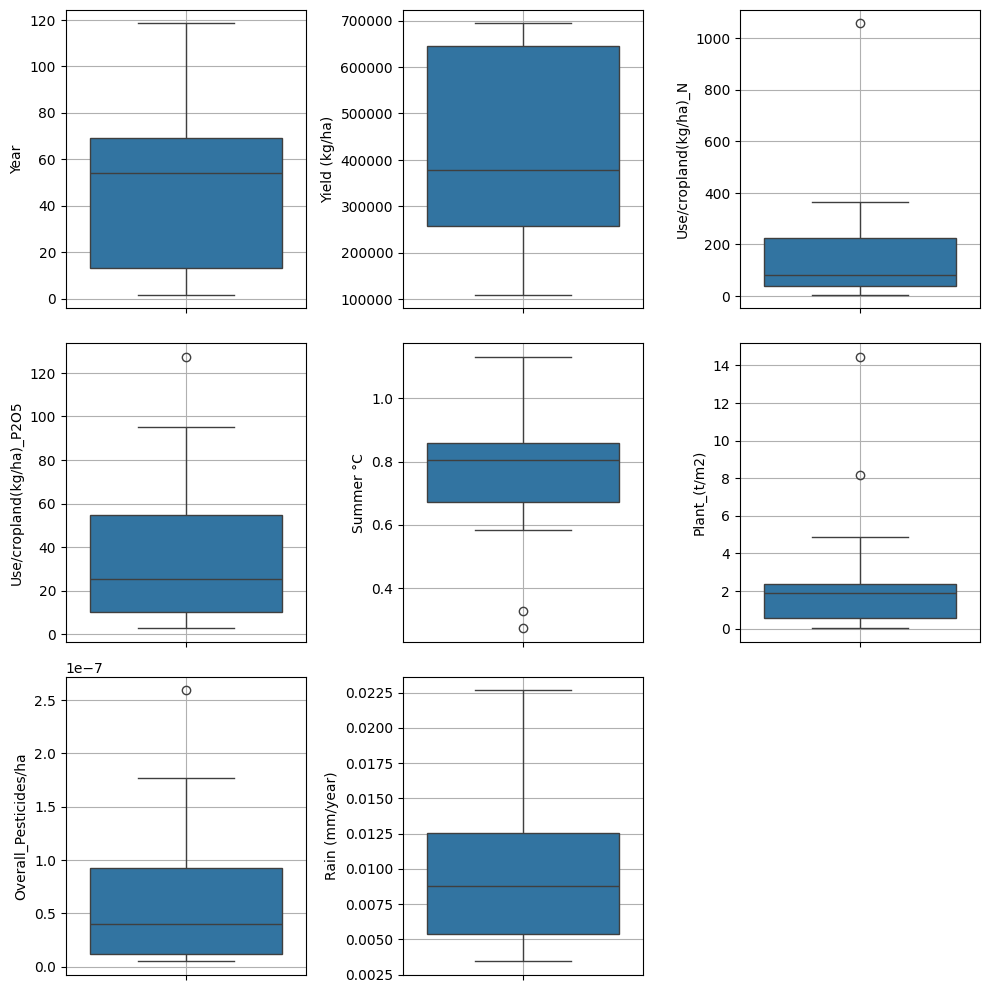

In [90]:
plt.figure(figsize=(10, 10))
for idx, col in enumerate(var_join1.columns):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(y=col, data=var_join1)
    min_val = var_join1[col].min()
    max_val = var_join1[col].max()
    step = 10000 if (max_val - min_val) > 50000 else 5000
    #plt.yticks(np.arange(min_val, max_val + 1, step))
    plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
outliers3 = {}
Threshold=1
for col in var_join1.columns:
    q1 = var_join1[col].quantile(0.25)
    q3 = var_join1[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr * Threshold

    # Filter rows where the value is outside the boxplot range
    mask = (var_join1[col] > upper_bound)
    outlier_countries3 = var_join1.loc[mask].index.unique()
    outliers3[col] = outlier_countries3
all_outlier_countries3 = set()
for countries in outliers3.values():
    all_outlier_countries3.update(countries)

dft = dft[~dft["Area"].isin(all_outlier_countries3)]
dft = dft.dropna(how='any')
dft

,Area,Year,Yield (kg/ha),Use/cropland(kg/ha)_N,Use/cropland(kg/ha)_P2O5,Summer °C,Plant_(t/m2),Overall_Pesticides/ha,Rain (mm/year)
60,Austria,2011,5854.9,73.74,18.49,1.553,1.951803,0.000607,1.460321
61,Austria,2012,4138.8,61.92,16.60,2.577,2.187041,0.000563,1.418590
62,Austria,2013,5374.3,71.02,18.81,2.210,1.526813,0.000520,1.248186
63,Austria,2014,5921.7,70.89,20.79,1.061,1.757127,0.000688,1.486183
64,Austria,2015,5696.2,83.05,20.18,3.427,2.268249,0.000785,1.231803
...,...,...,...,...,...,...,...,...,...
4024,Sweden,2013,5779.2,62.11,10.44,1.189,0.814029,0.000359,0.731956
4025,Sweden,2014,6806.0,70.07,10.71,1.646,0.646114,0.000293,0.800716
4026,Sweden,2015,7213.2,73.77,11.09,-0.009,0.641460,0.000398,0.871654
4031,Sweden,2020,7156.1,84.65,14.99,1.495,1.419507,0.000340,0.740426


### b. Model selection

Quick CV (baseline):
Ridge        CV RMSE: 552.240 ± 105.750
RandomForest CV RMSE: 600.567 ± 98.196
HistGB       CV RMSE: 752.437 ± 98.684
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits

RF best CV RMSE: 610.4646101753096
RF best params: {'model__bootstrap': True, 'model__criterion': 'squared_error', 'model__max_depth': 8, 'model__max_features': 1.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 335}

HGB best CV RMSE: 673.758534863196
HGB best params: {'model__l2_regularization': 0.42445691213304193, 'model__learning_rate': 0.1359860858904157, 'model__max_bins': 205, 'model__max_depth': 10, 'model__max_leaf_nodes': 86, 'model__min_samples_leaf': 13}

Winner: RandomForest
Test RMSE: 703.028
Test R² : 0.770

Top permutation importances (raw):
                    feature  importance
6                      Area  540.221612
2     Use/cropland(kg/ha)_N  472.357259
1     Overall

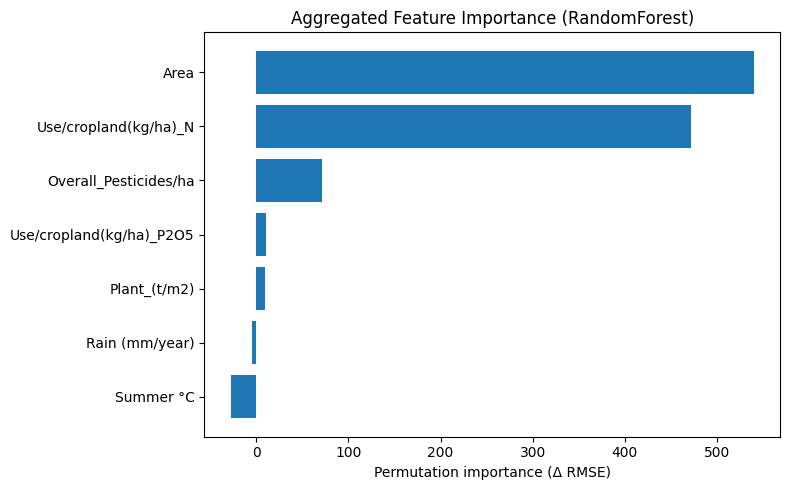

In [98]:
# ===== Crop Yield Modeling: End-to-End with Tuning =====

# -------------------------
# Config
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.2
USE_GROUPS = False          # True → group-aware CV/split by Area
USE_LOG_TARGET = False      # True → model log1p(y)

# -------------------------
# Load & clean
# -------------------------
df =dft
df = df[features + [target]].copy()
for c in numerical_features + [target]:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna(subset=features + [target]).reset_index(drop=True)

X = df[features]
y = df[target].astype(float)
if USE_LOG_TARGET:
    y = np.log1p(y)

# -------------------------
# Split (optionally group-aware)
# -------------------------
if USE_GROUPS:
    unique_areas = X['Area'].unique()
    rng = np.random.default_rng(RANDOM_STATE)
    test_areas = set(rng.choice(unique_areas, size=max(1, int(len(unique_areas)*TEST_SIZE)), replace=False))
    test_mask = X['Area'].isin(test_areas)
    X_train, X_test = X[~test_mask], X[test_mask]
    y_train, y_test = y[~test_mask], y[test_mask]
    groups_train = X_train['Area']
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )
    groups_train = None

# -------------------------
# Preprocessing
# Trees: OneHotEncoder only; Linear: OHE + scaling
# -------------------------
preproc_tree = ColumnTransformer(
    [('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)
preproc_linear =ColumnTransformer(
    [('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
     ('num', StandardScaler(), numerical_features)],
    remainder='drop'
)

# -------------------------
# Baseline models
# -------------------------
ridge_pipe = Pipeline([
    ('prep', preproc_linear),
    ('model', Ridge(random_state=RANDOM_STATE))
])
rf_pipe = Pipeline([
    ('prep', preproc_tree),
    ('model', RandomForestRegressor(random_state=RANDOM_STATE))
])
hgb_pipe = Pipeline([
    ('prep', preproc_tree),
    ('model', HistGradientBoostingRegressor(
        random_state=RANDOM_STATE, early_stopping=True, validation_fraction=0.2
    ))
])

# CV splitter
cv = GroupKFold(n_splits=min(5, max(2, X_train['Area'].nunique()))) if USE_GROUPS else 5
cv_groups = groups_train if USE_GROUPS else None

def cv_rmse(pipe):
    scores = cross_val_score(
        pipe, X_train, y_train, scoring='neg_root_mean_squared_error',
        cv=cv, groups=cv_groups, n_jobs=-1
    )
    return -scores.mean(), scores.std()

print("Quick CV (baseline):")
for name, pipe in [('Ridge', ridge_pipe), ('RandomForest', rf_pipe), ('HistGB', hgb_pipe)]:
    try:
        mean, std = cv_rmse(pipe)
        print(f"{name:12s} CV RMSE: {mean:.3f} ± {std:.3f}")
    except Exception as e:
        print(f"{name} failed: {e}")

# -------------------------
# Hyperparameter tuning (near your chosen values)
# -------------------------
rf_param_dist = {
    'model__n_estimators': randint(200, 600),         # around 300
    'model__max_depth': [8, 10, 12, 15, None],        # around 10
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 6),
    'model__max_features': ['sqrt', 'log2', 0.6, 1.0],
    'model__bootstrap': [True, False],
    'model__criterion': ['squared_error']             # valid for RF
}
hgb_param_dist = {
    'model__learning_rate': loguniform(0.05, 0.2),    # around 0.1
    'model__max_depth': [6, 8, 10, 12],               # around 10
    'model__max_leaf_nodes': randint(60, 140),        # around 100
    'model__min_samples_leaf': randint(5, 40),
    'model__l2_regularization': uniform(0.0, 0.5),
    'model__max_bins': randint(64, 255)
}


rf_search = RandomizedSearchCV(
    rf_pipe, rf_param_dist, n_iter=40, cv=cv,
    scoring='neg_root_mean_squared_error', n_jobs=-1,
    random_state=RANDOM_STATE, verbose=1
)
hgb_search = RandomizedSearchCV(
    hgb_pipe, hgb_param_dist, n_iter=40, cv=cv,
    scoring='neg_root_mean_squared_error', n_jobs=-1,
    random_state=RANDOM_STATE, verbose=1
)

if USE_GROUPS:
    rf_search.fit(X_train, y_train, groups=cv_groups)
    hgb_search.fit(X_train, y_train, groups=cv_groups)
else:
    rf_search.fit(X_train, y_train)
    hgb_search.fit(X_train, y_train)

print("\nRF best CV RMSE:", -rf_search.best_score_)
print("RF best params:", rf_search.best_params_)
print("\nHGB best CV RMSE:", -hgb_search.best_score_)
print("HGB best params:", hgb_search.best_params_)

best_search = rf_search if rf_search.best_score_ > hgb_search.best_score_ else hgb_search
best_name = 'RandomForest' if best_search is rf_search else 'HistGB'
best_model = best_search.best_estimator_

# -------------------------
# Test evaluation
# -------------------------
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
if USE_LOG_TARGET:
    y_true_eval = np.expm1(y_test)
    y_pred_eval = np.expm1(y_pred)
else:
    y_true_eval = y_test
    y_pred_eval = y_pred

rmse = mean_squared_error(y_true_eval, y_pred_eval, squared=False)
r2 = r2_score(y_true_eval, y_pred_eval)
print(f"\nWinner: {best_name}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R² : {r2:.3f}")

# -------------------------
# Feature importances (permutation, robust for pipelines)
# -------------------------
perm = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10, random_state=RANDOM_STATE,
    scoring='neg_root_mean_squared_error'
)

orig_cols = list(X.columns)  # names before preprocessing
imp_df = pd.DataFrame({'feature': orig_cols, 'importance': perm.importances_mean}) \
          .sort_values('importance', ascending=False)

def base_feature(name):
    return name.split('_')[0] if name.startswith(tuple(categorical_features)) else name

agg_imp = (imp_df.assign(base=imp_df['feature'].map(base_feature))
                 .groupby('base', as_index=False)['importance'].sum()
                 .sort_values('importance', ascending=False))

print("\nTop permutation importances (raw):")
print(imp_df.head(15))

print("\nAggregated importances:")
print(agg_imp)

# Plot aggregated importances
plt.figure(figsize=(8, 5))
plt.barh(agg_imp['base'][::-1], agg_imp['importance'][::-1])
plt.xlabel("Permutation importance (Δ RMSE)")
plt.title(f"Aggregated Feature Importance ({best_name})")
plt.tight_layout()
plt.show()

Conclusion
The Random Forest Regressor outperformed all other models with the lowest error and an R² of 0.77, indicating that it explains 77% of the variance in crop production based on: Seasonal temperatures, Fertiliser usage, Pesticide usage, Cultivated area.
This result demonstrates that ensemble models are highly effective in capturing the complex relationships between climatic/agronomic inputs and agricultural outputs.

### c. Prediction of yield for 2020-2070

In [93]:
# Column selection
selected_columns = ["Year", "Area",
    "Use/cropland(kg/ha)_N",
    "Overall_Pesticides/ha",
    "Use/cropland(kg/ha)_P2O5",
    "Use/cropland(kg/ha)_K2O",
    "Rain (mm/year)",
    "Summer °C", "Winter °C", "Autumn °C", "Spring °C"
]

# get the dataset with rain and temperature previsions
df= pd.read_csv('/work/dataset_prev.csv')
X = df[(df.Year >= 2020) & (df.Year <= 2070)][selected_columns].copy()

# Parameters for fertilizer and pesticides
lambda_p = np.log(2) / 10     # -50% in 10 years for pesticides
lambda_f = np.log(5 / 4) / 10 # -20% in 10 years for fertilizers

#Computing Y0
Y0_dict = {
    'Plant_(t/m2)': df[df.Year == 2020][['Plant_(t/m2)', 'Area']].fillna(0),
    'Overall_Pesticides/ha': df[df.Year == 2020][['Overall_Pesticides/ha', 'Area']].fillna(0),
    'Use/cropland(kg/ha)_N': df[df.Year == 2020][['Use/cropland(kg/ha)_N', 'Area']].fillna(0),
    'Use/cropland(kg/ha)_P2O5': df[df.Year == 2020][['Use/cropland(kg/ha)_P2O5', 'Area']].fillna(0),
    'Use/cropland(kg/ha)_K2O': df[df.Year == 2020][['Use/cropland(kg/ha)_K2O', 'Area']].fillna(0),
}

# Mapping lambdas for features
lambda_map = {
    'Plant_(t/m2)': lambda_p,
    'Overall_Pesticides/ha': lambda_p,
    'Use/cropland(kg/ha)_N': lambda_f,
    'Use/cropland(kg/ha)_P2O5': lambda_f,
    'Use/cropland(kg/ha)_K2O': lambda_f,
}

# Model of shape Y(t) = Y0 * exp(-lambda *t)
def evolution(y0_df, area, Lambda, t):
    try:
        y0_value = y0_df[y0_df.Area == area].iloc[0:4, 0].mean()
    except IndexError:
        y0_value = 0  
    return y0_value * np.exp(-Lambda * t)

# filling missing data according to previous odel
for column in lambda_map:
    y0_df = Y0_dict[column]
    Lambda = lambda_map[column]
    for area in df.Area.dropna().unique():
        mask = (X.Area == area) & (X.Year >= 2020) & (X.Year <= 2070)
        years = X.loc[mask, 'Year']
        t_values = years - 2020
        X.loc[mask, column] = [evolution(y0_df, area, Lambda, t) for t in t_values]

# prediction
X.dropna(inplace=True)  
Y = best_model.predict(X)
X["Yield (kg/ha)"] = Y
df_prediction = X[["Area","Year","Yield (kg/ha)"]]

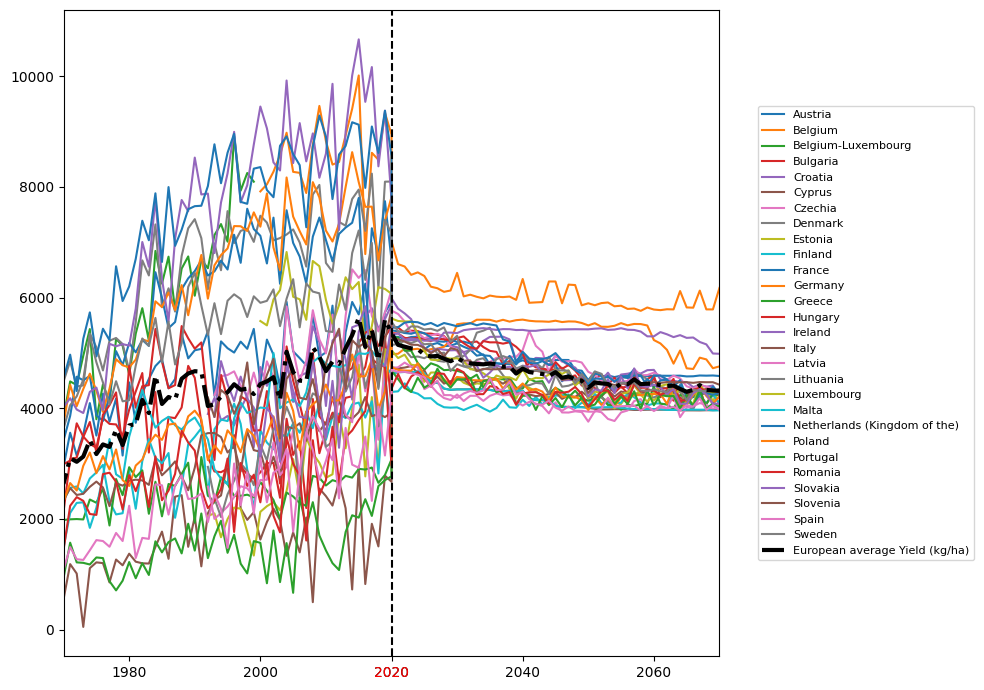

In [94]:
#Plot the yields accross the year of each country
df = pd.read_csv('/work/dataset.csv')
yields_init = df[df.Year <=2020][['Area', 'Year', 'Yield (kg/ha)']].dropna()

yields_total=pd.concat([yields_init,df_prediction])
yields_total_mean= yields_total.groupby('Year')['Yield (kg/ha)'].mean().reset_index()
area_total= yields_total['Area'].unique()

plt.figure(figsize=(10,7))

for area in area_total:
    yields_area=yields_total[yields_total.Area==area]
    plt.plot(yields_area['Year'],yields_area['Yield (kg/ha)'],label=area)

plt.plot(yields_total_mean['Year'],yields_total_mean['Yield (kg/ha)'],label='European average Yield (kg/ha)',color='black', linewidth=3, linestyle='-.')
plt.legend(
    loc='center left',           # ancrage vertical au milieu
    bbox_to_anchor=(1.05, 0.5),  # x=1.05 (juste à droite), y=0.5 (milieu vertical)
    ncol=1,                      # nombre de colonnes dans la légende,
    fontsize=8                  # taille de la police
)
plt.axvline(x=2020, color='black', linestyle='--') 

#Add X legend
ax = plt.gca()  # Find the actual x axis
ax.text(2020, -0.015, '2020', transform=ax.get_xaxis_transform(),
        ha='center', va='top', color='red')
plt.xlim(1970,2070)
plt.tight_layout()
plt.show()

We plot all countries together to have an idea of the prediction. We know that it's  not readable (because  the colours are reused for different countries), that's why we plot them according to their yield categories

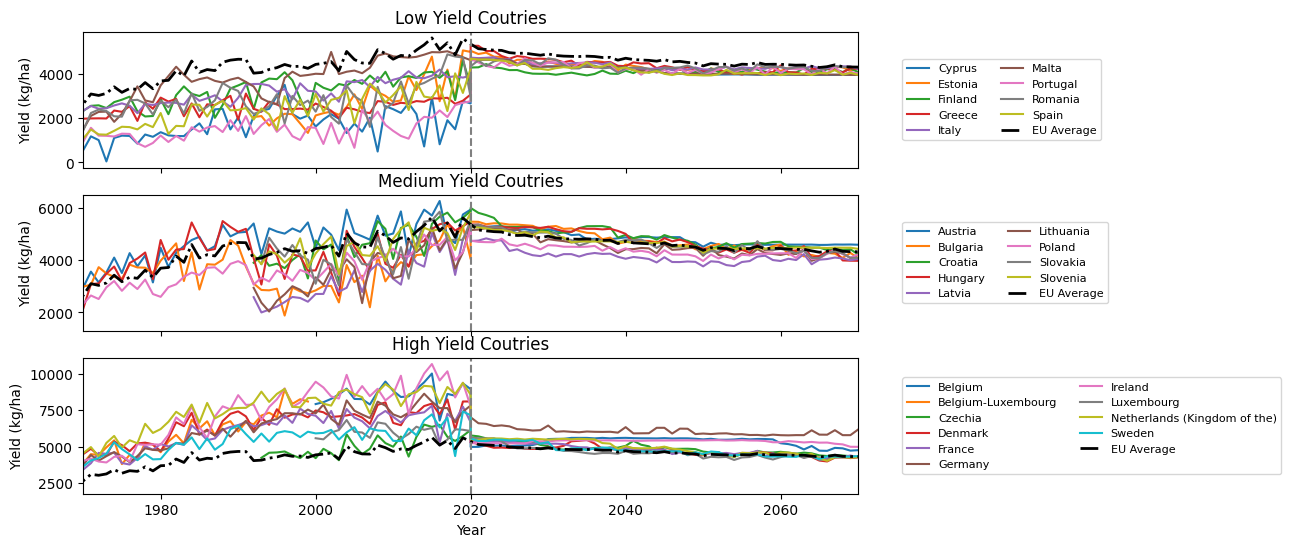

In [95]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

for ax, category,title in zip(axes, [low_yield_coutries, medium_yield_coutries, high_yield_coutries],["Low Yield Coutries","Medium Yield Coutries","High Yield Coutries"]):
    # Subset for this category
    data_cat = yields_total[yields_total.Area.isin(category)]
    
    # Plot each country's yield curve
    for area in data_cat['Area'].unique():
        data_area = data_cat[data_cat['Area'] == area]
        ax.plot(data_area['Year'], data_area['Yield (kg/ha)'], label=area)
    
        # Plot EU average
    ax.plot(yields_total_mean['Year'], yields_total_mean['Yield (kg/ha)'],
            label='EU Average', color='black', linewidth=2, linestyle='-.')
    ax.set_title(f'{title}')
    ax.axvline(x=2020, color='grey', linestyle='--')
    ax.set_ylabel('Yield (kg/ha)')
    ax.legend(
    loc='center left',          
    bbox_to_anchor=(1.05, 0.5), 
    ncol=2,                     
    fontsize=8                  # taille de la police
    )


# Common x-label
plt.xlabel('Year')
#plt.tight_layout()
plt.xlim(1970,2070)
plt.show()

# VII. Conclusion

We can see that our model has a smaller variance compared to real measurements. A major bias is our hypothesis for future fertilizer and pesticide use. Yields tend to converge to close values for every country. We also saw that our RMSE was above500 kg/ha which is also a limit of our model. It can be interesting to find more reliable data about pesticide use and fertilizer to improve the size of our sample.